# Narrative Flow of Men and Women



 ### Hypothesis:

Solidarity and social relations were different in the men and women sections of Birkenau; men and women recall them in different ways and in different context; solidarity and social bonds have different place in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women; the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- either different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability or if they are similar transitions to them happen at different intensitiy


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women? What are those topics that prime them?
- How are topics of solidarity and social bonds related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- Where did solidarity take place? In what contexts did solidarity take place?



## Load the necessary libraries and set up paths

In [1]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *
from collections import Counter
from varname.helpers import Wrapper

In [2]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

## Load the relevant data

Load the complete women and men data 

In [3]:
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_complete  = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_1_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')

Load data representing men and women who worked

In [4]:
data_set_1_w_work  = pyemma.load(input_directory+'work_w'+'/'+'pyemma_model','simple')
data_set_1_m_work = pyemma.load(input_directory+'work_m'+'/'+'pyemma_model','simple')

Load data representing men and women who did not  work

In [5]:
data_set_1_w_not_w  = pyemma.load(input_directory+'notwork_w'+'/'+'pyemma_model','simple')
data_set_1_m_not_w = pyemma.load(input_directory+'notwork_m'+'/'+'pyemma_model','simple')

Load the state index

In [6]:
input_directory = parent +'/'+ constants.output_data_segment_keyword_matrix
features_df = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)

## Create functions for frequently used operations

### Calculate first mean passage time function

In [7]:
def calculate_mfpt(mm,source,target,topic_labels):
    source_indices = []
    for element in source:
        source_index_full = topic_labels.index(element)
        source_index_active = mm._full2active[source_index_full]
        source_indices.append(source_index_active)
    target_indices = []
    for element in target:
        target_index_full = topic_labels.index(element)
        target_index_active = mm._full2active[target_index_full]
        target_indices.append(target_index_active)
    print (source_indices)
    mfpt = pyemma.msm.tpt(mm,source_indices,target_indices).mfpt
    print (mfpt)

### Print paths functions

In [115]:
def print_paths(flux_w,max_length=None):
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                print (path + ':' + str(flux_w[path]))
                print ('\n')
        else:
            print (path + ':' + str(flux_w[path]))
            print ('\n')

In [165]:
def print_similar_paths(flux_w,flux_m,max_length=None):
    all_paths = []
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    for path in flux_m:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    counts = Counter(all_paths)

    dup_paths = [path for path in all_paths  if counts[path] > 1]
    dup_paths = set(dup_paths)
    for path in dup_paths:
        print (path)
        print ('Women: '+str(flux_w[path]))
        print ('Men: '+str(flux_m[path]))
        print ('\n')


### Load  the topic map

In [8]:
topic_map_directory = parent +'/'+constants.input_data+'feature_maps/'
topic_map = pd.read_csv(topic_map_directory+'feature_map_no_friends_no_food_sharing.csv')
topic_map_living_conditions = topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list()

topic_map_living_condition = []
for element in topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list():
    if 'camp' in element:
        topic_map_living_condition.append(' '.join(element.split(' ')[1:]))
    else:
        topic_map_living_condition.append(element)

In [9]:
topic_map_forced_labor = topic_map[topic_map['CoverTerm']=="forced labor"].KeywordLabel.to_list()

## Observation 1

### Qualitative description

Both men and women discuss aid giving in the context of camp living conditions and forced labour, women are more likely to discuss it in the context of camp living conditions. While men are more likely to discuss it following forced labour. 

For instance, the following pathway is present in both men and women testimonies but in testimonies of women (3.3%), more traffic is going through it than in testimonies of men(2%):

arrival-selections-intake procedures-living conditions-aid giving

Furthermore, the amount of traffic going through the following path is different for men (2.8) and women (4.4%) :

living conditions-aid giving

Similarly, more traffic is going through the following path for women (3 %) and men (0.8%):

living conditions-food-aid giving

Finally, when the direct path between forced labor and aid giving is examined then in case of men (11.357897171905313) more traffic is going than in case of women (9%):

forced labor-aid giving

### Quantitative evidence 1

In [20]:
story_start = 'arrival'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()
flux = 1

In [21]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [22]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those contexts where living conditions prime aid giving for women

In [23]:
result = []

for path in flux_w:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-selections-intake procedures-living conditions-aid giving
3.3261557044393664


arrival-loved ones' separations-intake procedures-housing conditions-aid giving
1.2580761275344385


arrival-intake procedures-housing conditions-sanitary conditions-aid giving
1.0985710714183092


arrival-sisters-departure-transfer conditions-intake procedures-environmental conditions-aid giving
0.2414605667609902


arrival-housing conditions-food-selections-intake procedures-Appell-sanitary conditions-infestations-aid giving
0.2007682669680113


arrival-German soldiers-intake procedures-showers-aid giving
0.11875671237813673


arrival-brothers-intake procedures-housing conditions-food-sanitary conditions-lice-aid giving
0.08476580277105308


arrival-migration experiences-working life-future message-loved ones' introductions-living conditions-selections-transfer to camps-transfer conditions-transfer sanitary conditions-aid giving
0.07689406704760635


arrival-Czechoslovak prisoners-selections-intake

Print the total amount of traffic going through these nodes

In [24]:
print (np.array(result).sum())

6.480161664038617


Print those contexts where living conditions prime aid giving for men

In [25]:
result = []

for path in flux_m:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-intake procedures-living conditions-aid giving
2.0488989687848225


arrival-intake procedures-housing conditions-aid giving
1.6903370505760626


arrival-intake procedures-showers-aid giving
0.5527160765795579


arrival-crematoria-selections-intake procedures-food-latrines-aid giving
0.4508621445562738


arrival-living conditions-infestations-aid giving
0.371666476982283


arrival-food-hunger-selections-intake procedures-uniforms-housing conditions-sanitary conditions-aid giving
0.20325474364557297


arrival-food acquisition-departure-transfer conditions-intake procedures-prisoner tattoos (stills)-environmental conditions-aid giving
0.164327499366274


arrival-deportation family interactions-selections-intake procedures-personal property seizure-deportation food-deportation sanitary conditions-aid giving
0.021831766890181566


arrival-dwarf prisoners-family interactions-selections-intake procedures-housing conditions-sanitary conditions-aid giving
0.01964111053769269


Print the total amount of traffic going through these nodes

In [26]:
print (np.array(result).sum())

5.542651988549617


Print those contexts where forced labor prime aid giving for women

In [27]:
result = []

for path in flux_w:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-intake procedures-living conditions-forced labor-aid giving
5.366424007453563


arrival-loved ones' separations-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
1.4556141516854084


arrival-loved ones' separations-intake procedures-living conditions-selections-transfer to camps-German concentration camps (generic)-forced labor-forced labor conditions-aid giving
0.34845903658844235


arrival-Jewish prisoner functionaries-selections-transfer to camps-transfer conditions-forced labor companies-aid giving
0.15095369770971961


arrival-Siemens (firm)-aid giving
0.011172864606263636


arrival-languages-Greek prisoners-corpses-selections-loved ones' final contacts-orchestras-Siemens (firm)-aid giving
0.005987338618148708




Print the total amount of traffic going through these nodes

In [28]:
print (np.array(result).sum())

7.338611096661546


Print those paths where forced labor prime aid giving for men

In [29]:
result = []

for path in flux_m:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
4.673073571268745


arrival-selections-intake procedures-forced labor-aid giving
3.9390573005910623


arrival-loved ones' separations-intake procedures-living conditions-forced labor-forced labor conditions-aid giving
0.9189153741606001


arrival-body searches-prisoner tattoos-forced labor-I. G. Farben-aid giving
0.06211097888215399


arrival-Belgian prisoners-Holocaust faith issues-departure-freight trains-transfer conditions-loved ones' fates-forced labor companies-aid giving
0.020680896807975545


arrival-camp procedures-transfer to camps-transfer conditions-loved ones' fates-forced labor companies-aid giving
0.00421413682829218




Print the total amount of traffic going through these nodes

In [30]:
print (np.array(result).sum())

9.61805225853883


### Visualization

9 labels to show
9 labels to show


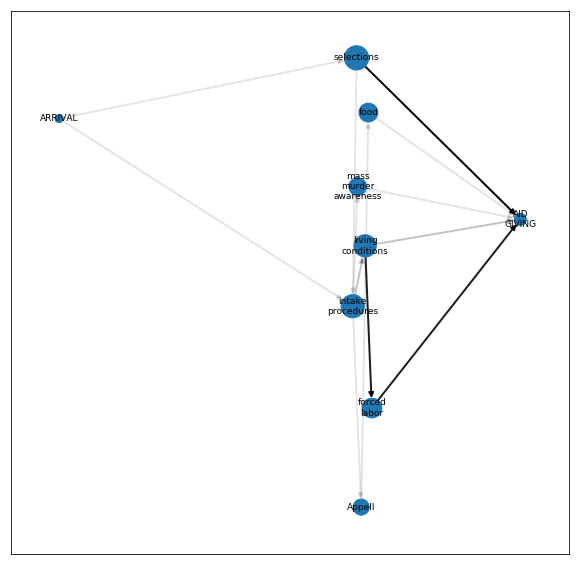

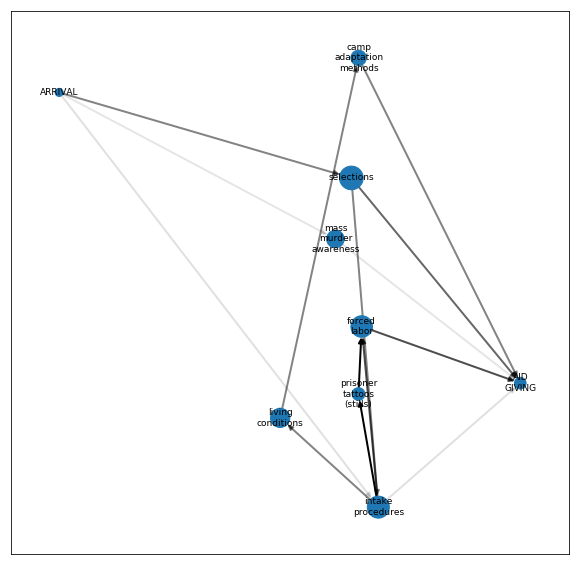

In [370]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [171]:
story_start = 'living conditions'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [180]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [181]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

Print the most important pathways for women

In [174]:
print_paths(flux_w,max_length=3)

living conditions-forced labor-aid giving:6.644852704834618


living conditions-selections-aid giving:5.494808205247127


living conditions-aid giving:4.417279021596912


living conditions-food-aid giving:3.0176115426843433


living conditions-camp adaptation methods-aid giving:2.9336925881011084


living conditions-mass murder awareness-aid giving:2.920880229051546


living conditions-Appell-aid giving:2.0333141829806163


living conditions-family interactions-aid giving:1.7830534367901554




Print the most important pathways for men

In [175]:
print_paths(flux_m,max_length=3)

living conditions-forced labor-aid giving:6.564598702399662


living conditions-camp adaptation methods-aid giving:4.4181837256414696


living conditions-selections-aid giving:3.471622581939516


living conditions-aid giving:2.8647828113142224


living conditions-mass murder awareness-aid giving:2.4899964842110562


living conditions-housing conditions-aid giving:1.6076542634355284


living conditions-social relations-aid giving:1.572449463695696


living conditions-brutal treatment-aid giving:1.5272301041002188


living conditions-Appell-aid giving:1.4497261529085559




Print similar pathways

In [186]:
print_similar_paths(flux_w,flux_m)

living conditions-extended family members-aid giving
Women: 1.225256479914631
Men: 0.8011126426628061


living conditions-selections-intake procedures-aid giving
Women: 1.9239348755373278
Men: 2.382461559287751


living conditions-prisoner external contact-aid giving
Women: 0.6907330265617383
Men: 0.7358489769871611


living conditions-Blockälteste-aid giving
Women: 1.4297207357737838
Men: 0.47926944203580374


living conditions-aid giving
Women: 4.417279021596912
Men: 2.8647828113142224


living conditions-social relations-aid giving
Women: 1.646803261212461
Men: 1.572449463695696


living conditions-camp adaptation methods-aid giving
Women: 2.9336925881011084
Men: 4.4181837256414696


living conditions-survival explanations-aid giving
Women: 0.4444274121911082
Men: 0.609458399124247


living conditions-Appell-aid giving
Women: 2.0333141829806163
Men: 1.4497261529085559


living conditions-diseases-aid giving
Women: 1.181620060637828
Men: 1.0008377855366162


living conditions-selecti

### Visualize

7 labels to show
10 labels to show


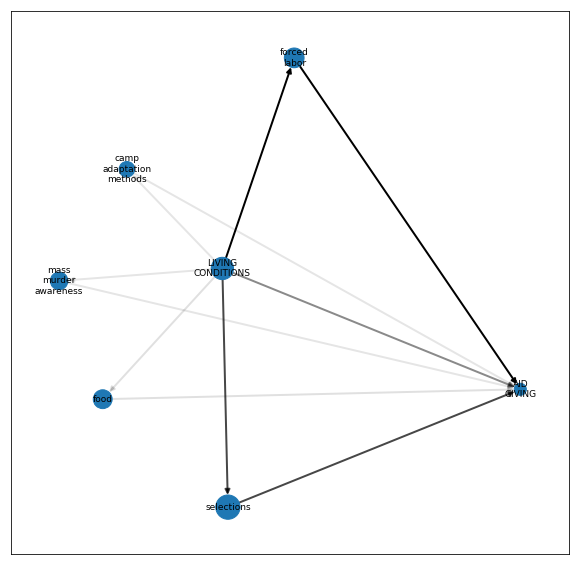

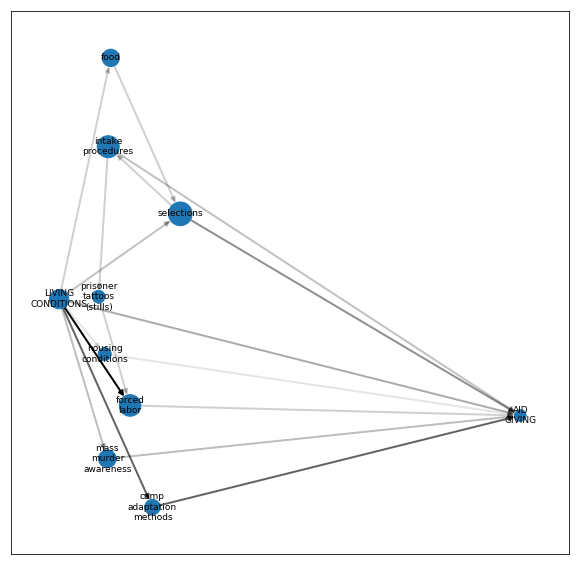

In [378]:
flux=0.25
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [187]:
story_start = 'forced labor'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [188]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

In [189]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

Print most important path for women

In [190]:
print_paths(flux_w,max_length=2)

forced labor-aid giving:9.61463771635918




Print most important path for men

In [191]:
print_paths(flux_m,max_length=2)

forced labor-aid giving:11.357897171905313




## Observation 2

### Qualitative description

As above, a key topic that follows the discussion of aid giving is forced labour. However, this has different weight in the narratives of men and women. Men are more likely to discuss forced labour following aid giving. By contrast, women are more likely to discuss housing and living conditions.



### Quantitative evidence

In [194]:
story_start = 'aid giving'
story_end = 'departure'
flux = 1

In [195]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [196]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Calculate for women

In [333]:
result = []

for path in flux_w:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

aid giving-forced labor-departure
2.7296158781494175


aid giving-forced labor-food-selections-intake procedures-clothing-departure
0.8289941816137725


aid giving-forced labor-Mengele, Josef-intake procedures-housing conditions-social relations-departure
0.5123192060883646


aid giving-forced labor-food-sanitary conditions-physical hygiene maintenance-Allied military operations-departure
0.07939032173836172


4.150319587589916


Calculate for men

In [334]:
result = []

for path in flux_m:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

aid giving-forced labor-departure
2.4194474651698146


aid giving-forced labor-politico-military event awareness-departure
1.3753853668599325


aid giving-forced labor-food acquisition-departure
1.3548259776625797


aid giving-forced labor-brutal treatment-departure
0.8978199621392627


aid giving-forced labor-food-departure
0.7325144039431423


aid giving-forced labor-Polish prisoners-food-arrival-selections-intake procedures-prisoner tattoos-prisoner tattoos (stills)-Greek prisoners-departure
0.17555899775649847


6.955552173531229


In [335]:
result = []

for path in flux_w:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')
print (np.array(result).sum())

aid giving-living conditions-selections-transfer to camps-departure
2.5186672379147423


aid giving-living conditions-departure
0.9061933059574195


aid giving-housing conditions-departure
0.8587674293844215


aid giving-living conditions-forced labor-bombardments-departure
0.2997903332730708


aid giving-housing conditions-Appell-forced labor-food acquisition-hiding and evasion-departure
0.1911433227958466


aid giving-living conditions-loved ones' renewed contacts-loved ones' fates-prisoner tattoos-showers-clothing-shoes-Mengele, Josef-arrival-selections-transfer to camps-forced march conditions-forced march guards-departure
0.006853354589021588


aid giving-living conditions-Appell-SS/SD personnel-intake procedures-gas chambers-doctors-departure
0.0023650301763213028


4.783780014090843


Calculate for men

In [336]:
result = []

for path in flux_m:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')
print (np.array(result).sum())

aid giving-living conditions-camp adaptation methods-departure
1.6736271018173603


aid giving-living conditions-Appell-selections-intake procedures-prisoner tattoos (stills)-departure
1.0886399886292717


aid giving-housing conditions-living conditions-transfer to camps-transfer conditions-perpetrator liberator-approach responses-departure
0.7409143120709991


aid giving-housing conditions-food-Soviet prisoners-departure
0.2652825562797489


aid giving-living conditions-food-latrines-departure
0.06391810038896809


aid giving-living conditions-food-gas chambers-psychological reactions-Roma prisoners-prisoner tattoos-criminal prisoners-survival explanations-attitudes-Holocaust testimony sharing reluctance-Holocaust testimony sharing willingness-post-World War II reflections-transfer to camps-transfer deaths-transfer killings-Ukrainian prisoners-departure
0.004501601303121525


aid giving-housing conditions-camp procedures-forced labor-prisoner identification numbers-prisoner tattoos (s

### Visualization

9 labels to show
12 labels to show


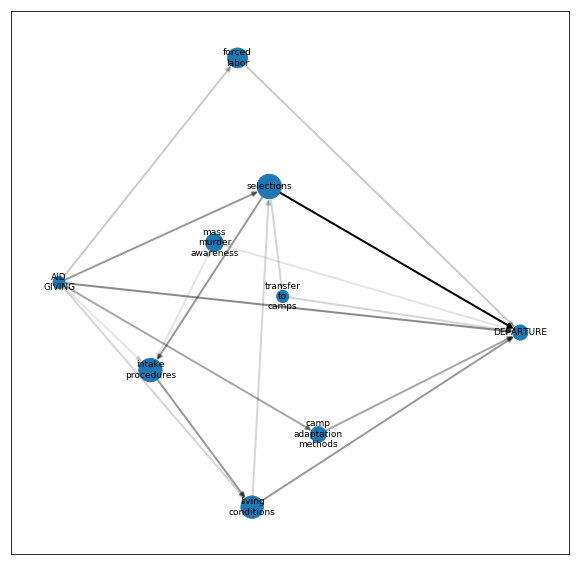

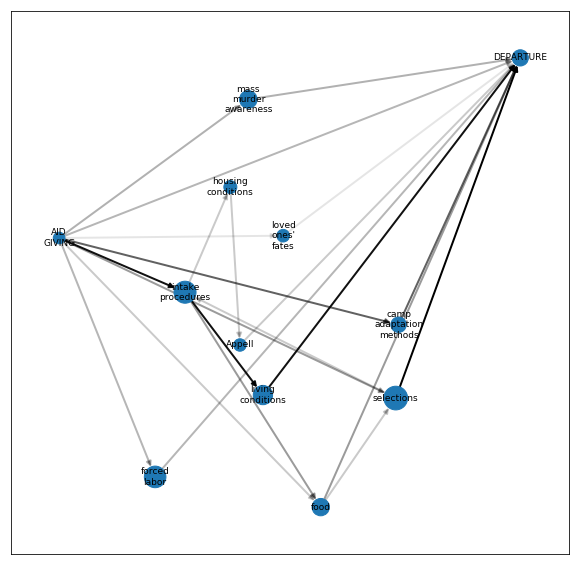

In [337]:
flux = 0.25
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

In [390]:
story_start = 'aid giving'
story_end = 'living conditions'
state_index = features_df.KeywordLabel.to_list()

In [391]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Path flux		%path	%of total	path
aid giving-selections-intake procedures-living conditions-forced labor
7.563140054082339
aid giving-forced labor
5.892215934536441
aid giving-intake procedures-Appell-food-forced labor
3.55246182830108
aid giving-living conditions-selections-forced labor
3.3251005302361296
aid giving-selections-intake procedures-housing conditions-Appell-forced labor
3.0283692435029446
aid giving-camp adaptation methods-forced labor
2.944930089053586
aid giving-loved ones' separations-intake procedures-prisoner tattoos (stills)-forced labor
2.561534086812852
aid giving-mass murder awareness-forced labor
2.5096046379381978
aid giving-Mengele, Josef-intake procedures-forced labor
2.2214249224976057
aid giving-Appell-selections-intake procedures-housing conditions-forced labor
2.166241889810906
aid giving-food-selections-intake procedures-prisoner tattoos-forced labor
1.965071734855506
aid giving-family interactions-forced labor
1.7654145011245672
aid giving-loved ones' fat

In [399]:
story_start = 'aid giving'
story_end = 'forced labor'
state_index = features_df.KeywordLabel.to_list()

In [400]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Path flux		%path	%of total	path
aid giving-selections-intake procedures-living conditions-forced labor
7.563140054082339
aid giving-forced labor
5.892215934536441
aid giving-intake procedures-Appell-food-forced labor
3.55246182830108
aid giving-living conditions-selections-forced labor
3.3251005302361296
aid giving-selections-intake procedures-housing conditions-Appell-forced labor
3.0283692435029446
aid giving-camp adaptation methods-forced labor
2.944930089053586
aid giving-loved ones' separations-intake procedures-prisoner tattoos (stills)-forced labor
2.561534086812852
aid giving-mass murder awareness-forced labor
2.5096046379381978
aid giving-Mengele, Josef-intake procedures-forced labor
2.2214249224976057
aid giving-Appell-selections-intake procedures-housing conditions-forced labor
2.166241889810906
aid giving-food-selections-intake procedures-prisoner tattoos-forced labor
1.965071734855506
aid giving-family interactions-forced labor
1.7654145011245672
aid giving-loved ones' fat

In [398]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Path flux		%path	%of total	path
aid giving-forced labor
9.179672557709363
aid giving-selections-intake procedures-living conditions-forced labor
4.787375746821802
aid giving-intake procedures-prisoner tattoos (stills)-forced labor
3.8685777927699085
aid giving-selections-forced labor
3.610991081359551
aid giving-food-forced labor
2.492791578639469
aid giving-mass murder awareness-forced labor
2.4416033200480216
aid giving-loved ones' fates-forced labor
2.0051237205602863
aid giving-camp adaptation methods-forced labor
1.9179842085775847
aid giving-living conditions-food-selections-intake procedures-forced labor
1.540512855854999
aid giving-intake procedures-housing conditions-forced labor
1.4927207379766616
aid giving-departure-forced labor
1.4765060065889524
aid giving-Mengele, Josef-intake procedures-prisoner tattoos-forced labor
1.3955877779792345
aid giving-brutal treatment-forced labor
1.3315739039334016
aid giving-camp procedures-forced labor
1.1820919171210311
aid giving-social 

## Observation 3

### Qualitative description

Similarly to aid giving, women are more likely to discuss food sharing in the context of living conditions, whereas men discuss it in the context of forced labour. 

The total amount of traffic going through the following two paths for women is 11,8 % and for men it is 8.8%:

living conditions-food-food sharing
living conditions-food sharing

At the same time, the total traffic going through the following paths is different for men (18.3%) and women 15.2):

forced labor-food sharing
forced labor-food-food sharing


### Visualization

In [338]:
story_start = 'arrival'
story_end = 'food sharing'
flux = 1

In [339]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-intake procedures-housing conditions-Appell-food-food sharing
10.513088206537514
arrival-intake procedures-living conditions-forced labor-food sharing
8.917023181420248
arrival-selections-camp adaptation methods-food sharing
5.227533702378559
arrival-intake procedures-living conditions-food sharing
4.756063911165277
arrival-loved ones' separations-intake procedures-living conditions-selections-food sharing
3.1125640575679454
arrival-loved ones' separations-intake procedures-housing conditions-food-selections-departure-transfer to camps-food sharing
2.9381887133309825
arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-food sharing
2.7267929954641894
arrival-intake procedures-family interactions-food sharing
2.6334146055279617
arrival-loved ones' separations-intake procedures-food sharing
2.0107133800724477
arrival-extended family members-food sharing
1.9446766681301904
arrival-selections-intake proced

In [340]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-food sharing
9.63912877743524
arrival-selections-intake procedures-food-food sharing
6.685433496756592
arrival-intake procedures-forced labor-food acquisition-food sharing
5.911395597919235
arrival-selections-departure-transfer to camps-food sharing
4.991517245921279
arrival-intake procedures-living conditions-camp adaptation methods-food sharing
3.460509755050664
arrival-loved ones' separations-intake procedures-prisoner tattoos-forced labor-food sharing
3.209596127534682
arrival-selections-loved ones' fates-food sharing
3.1777600532410823
arrival-intake procedures-living conditions-departure-food sharing
2.8771099255418444
arrival-loved ones' separations-intake procedures-housing conditions-Appell-family interactions-food sharing
2.773448867109162
arrival-selections-intake procedures-living conditions-food-camp adaptation methods-aid giving-food sharing
2.588046768968176
arriva

Calculate the context of living conditions for women

In [341]:
result = []

for path in flux_w:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

arrival-intake procedures-living conditions-food sharing
4.756063911165277


arrival-loved ones' separations-intake procedures-housing conditions-food sharing
1.7558327389821418


6.511896650147419


Calculate the context of living conditions for men

In [342]:
result = []

for path in flux_m:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-housing conditions-food sharing
2.580383533099845


arrival-Mengele, Josef-intake procedures-living conditions-food sharing
2.00967295207804


4.590056485177885


Calculate the context of forced labor for women

In [343]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

arrival-intake procedures-living conditions-forced labor-food sharing
8.917023181420248


8.917023181420248


Calculate the context of forced labo for men

In [344]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-food sharing
9.63912877743524


arrival-loved ones' separations-intake procedures-prisoner tattoos-forced labor-food sharing
3.209596127534682


12.84872490496992


10 labels to show
12 labels to show


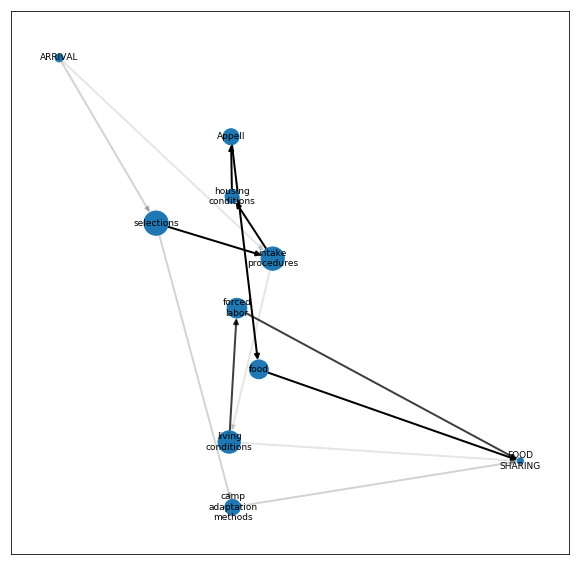

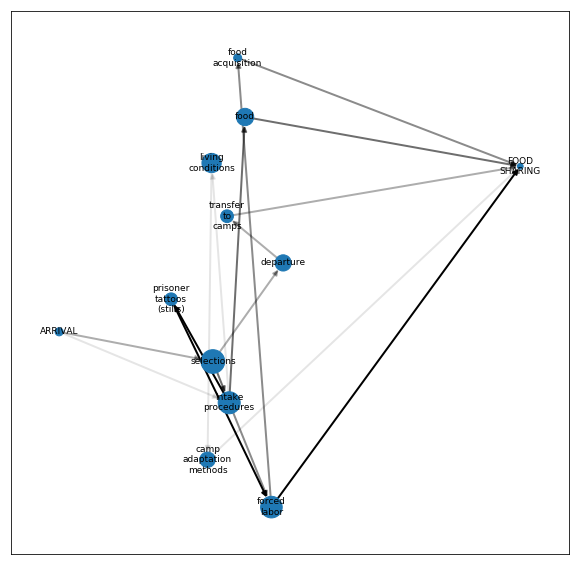

In [345]:
flux = 0.28
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

In [732]:
story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Path flux		%path	%of total	path
forced labor-food sharing
9.756762640497598
forced labor-food-food sharing
5.552864805475936
forced labor-living conditions-food sharing
4.317199211651201
forced labor-camp adaptation methods-food sharing
4.080364617672331
forced labor-selections-intake procedures-housing conditions-Appell-food-food sharing
3.236864861303691
forced labor-aid giving-food sharing
2.7102776128074293
forced labor-Appell-selections-food sharing
1.8868867144809953
forced labor-departure-transfer to camps-food sharing
1.6503917146362772
forced labor-family interactions-food sharing
1.6275910621913874
forced labor-food acquisition-food sharing
1.5327620312352606
forced labor-Mengele, Josef-intake procedures-food sharing
1.4216955729016159
forced labor-SS/SD personnel-intake procedures-housing conditions-food sharing
1.2133948703910293
forced labor-mass murder awareness-food sharing
1.1656817260698695
forced labor-social relations-food sharing
1.1457482475146596
forced labor-sani

In [733]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Path flux		%path	%of total	path
forced labor-food sharing
13.675652985006936
forced labor-food-food sharing
4.795520605873537
forced labor-food acquisition-food sharing
3.2672603853928046
forced labor-aid giving-food sharing
2.6220261238461853
forced labor-selections-intake procedures-housing conditions-food sharing
2.538708814391417
forced labor-camp adaptation methods-food sharing
2.4193054360721082
forced labor-living conditions-departure-transfer to camps-food sharing
2.0539783670863128
forced labor-social relations-food sharing
1.7396814008455899
forced labor-living conditions-food sharing
1.6368799157200002
forced labor-family interactions-food sharing
1.3904119987254429
forced labor-departure-food sharing
1.3629028894165838
forced labor-mass murder awareness-departure-transfer to camps-food sharing
1.3111123381587426
forced labor-Appell-food-food sharing
1.212375324182141
forced labor-kapos-food sharing
1.1692602751942374
forced labor-punishments-food sharing
1.0904369991461795


## Observation 4

### Qualitative description

In testimonies of men and women, both housing conditions and forced labour are discussed following food sharing.

### Visualization

In [346]:
story_start = 'food sharing'
story_end = 'departure'
flux = 1

In [347]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-selections-departure
6.867158139544298
food sharing-living conditions-departure
4.261560027826917
food sharing-camp adaptation methods-departure
3.698801213123281
food sharing-forced labor-departure
2.76665963846987
food sharing-Appell-food-selections-transfer to camps-departure
2.549069639605095
food sharing-loved ones' fates-intake procedures-living conditions-selections-transfer procedures-departure
2.4728870797092943
food sharing-departure
2.3110480855107385
food sharing-mass murder awareness-departure
2.191094877990339
food sharing-aid giving-selections-intake procedures-living conditions-transfer procedures-departure
2.091872893695317
food sharing-forced labor-food-departure
1.7959111395688039
food sharing-loved ones' fates-departure
1.774480307844524
food sharing-housing conditions-Appell-selections-intake procedures-living conditions-forced labor-aid giving-departure
1.506056984301137
food sharing-family interactions-departure
1.3983

In [348]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-selections-departure
4.626145950484521
food sharing-living conditions-departure
4.567739561953951
food sharing-mass murder awareness-departure
4.214943159452747
food sharing-food-departure
3.613686203787324
food sharing-forced labor-food-selections-intake procedures-living conditions-camp adaptation methods-departure
2.4271904832672804
food sharing-forced labor-departure
2.418825038415106
food sharing-departure
2.245224793650984
food sharing-social relations-selections-intake procedures-housing conditions-Appell-departure
2.1658390886782617
food sharing-food-camp adaptation methods-departure
1.9637539673913256
food sharing-intake procedures-living conditions-selections-loved ones' fates-departure
1.7078465849419957
food sharing-transfer to camps-departure
1.5232576032766851
food sharing-camp procedures-forced labor-politico-military event awareness-departure
1.5120735922409954
food sharing-camp adaptation methods-departure
1.4053969258011312

Calculate for women

In [349]:
result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state in topic_map_forced_labor:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

food sharing-forced labor-departure
2.76665963846987


food sharing-forced labor-food-departure
1.7959111395688039


food sharing-forced labor-Holocaust-related psychological reactions-departure
0.4393078904904754


food sharing-forced labor-German soldiers-intake procedures-living conditions-camp adaptation methods-famous French politicians and diplomats-departure
0.07918084351876627


food sharing-forced labor companies-Appell-selections-mass execution survival-departure
0.034553121084572896


food sharing-forced labor conditions-camp adaptation methods-loved ones' fates-Appell-food-typhoid fever-departure
0.03441085860677683


food sharing-forced labor-German camp guards-living conditions-Slovak prisoners-departure
0.008502186740440704


5.158525678479707


Calculate for men

In [350]:
result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

food sharing-forced labor-food-selections-intake procedures-living conditions-camp adaptation methods-departure
2.4271904832672804


food sharing-forced labor-departure
2.418825038415106


food sharing-forced labor-food acquisition-Sonderkommando prisoners-departure
0.3474959705061971


food sharing-forced labor-punishments-brutal treatment-living conditions-camp procedures-Jewish prayers-selections-camp adaptation methods-identity concealment-Gestapo personnel-departure
0.0626524935599511


food sharing-forced labor-covert economic activities-departure
0.024812356848907955


5.280976342597443


In [351]:
result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state in topic_map_living_conditions:
        result.append(flux_w[path])
print (np.array(result).sum())

7.106500659337999


Calculate for men

In [352]:
result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state in topic_map_living_conditions:
        result.append(flux_m[path])
print (np.array(result).sum())

7.547048084534303


9 labels to show
9 labels to show


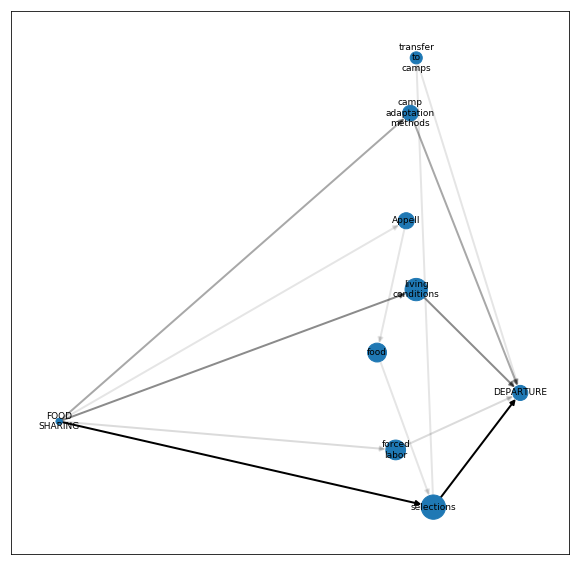

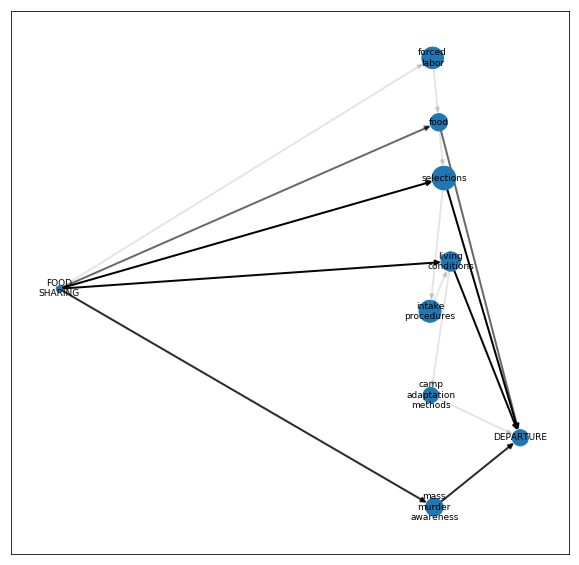

In [353]:
flux = 0.19
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 5 A

### Qualitative description

Women tend to discuss social bonds following living environment, whereas men tend to discuss it following social bonds. Different amount of traffic is going through the following paths in case of women (6.8 %) and men (5.7 %):
living conditions-social relations

Different amount of traffic is going through the following paths in case of women (4.6 %) and men (8.6 %):
forced labor-social relations

## Visualization

In [737]:
story_start = 'arrival'
story_end = 'social relations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-intake procedures-Appell-food-social relations
6.637430281125487
arrival-intake procedures-living conditions-social relations
5.385387680048888
arrival-selections-intake procedures-housing conditions-social relations
3.9600346977293084
arrival-selections-social relations
3.8065892276627737
arrival-intake procedures-mass murder awareness-social relations
3.533320887853658
arrival-intake procedures-living conditions-forced labor-social relations
3.3911642371375783
arrival-loved ones' separations-intake procedures-social relations
2.783506518841085
arrival-selections-camp adaptation methods-social relations
2.622154038383962
arrival-loved ones' separations-intake procedures-housing conditions-Appell-social relations
2.5649328977848858
arrival-intake procedures-housing conditions-sanitary conditions-social relations
2.316043943729432
arrival-loved ones' separations-intake procedures-living conditions-camp procedures-social relations
1.6137

Path flux		%path	%of total	path
arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-social relations
5.2452973753909795
arrival-selections-intake procedures-living conditions-social relations
4.395672199902185
arrival-selections-intake procedures-living conditions-camp adaptation methods-social relations
3.870079873264734
arrival-intake procedures-food-social relations
3.5748966302831993
arrival-selections-intake procedures-social relations
3.296527722815789
arrival-selections-intake procedures-housing conditions-social relations
2.7525900308091047
arrival-intake procedures-housing conditions-Appell-social relations
2.7060231812778412
arrival-selections-social relations
2.2154732557218373
arrival-intake procedures-forced labor-beatings-social relations
2.0528986185096376
arrival-loved ones' separations-intake procedures-prisoner tattoos-forced labor-social relations
1.6455694762081343
arrival-mass murder awareness-social relations
1.5639277652287624
arrival-inta

Calculate for women

In [738]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-social relations'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

arrival-intake procedures-living conditions-forced labor-social relations
3.3911642371375783


3.3911642371375783


Calculate for men

In [739]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-social relations'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-social relations
5.2452973753909795


arrival-loved ones' separations-intake procedures-prisoner tattoos-forced labor-social relations
1.6455694762081343


6.890866851599114


In [740]:
result = []

for path in flux_w:
    if len(path.split('living conditions-social relations'))>1 or len(path.split('housing conditions-social relations'))>1 or len(path.split('camp barracks-social relations'))>1 :
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-living conditions-social relations
5.385387680048888


arrival-selections-intake procedures-housing conditions-social relations
3.9600346977293084


arrival-intake procedures-camp barracks-social relations
1.0701833802330198


10.415605758011216


Calculate for men

In [741]:
result = []

for path in flux_m:
    if len(path.split('living conditions-social relations'))>1 or len(path.split('housing conditions-social relations'))>1 or len(path.split('camp barracks-social relations'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-social relations
4.395672199902185


arrival-selections-intake procedures-housing conditions-social relations
2.7525900308091047


arrival-intake procedures-camp barracks-social relations
0.39270465708599495


7.540966887797284


In [743]:
story_start = 'living conditions'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.2)

Path flux		%path	%of total	path
living conditions-social relations
6.827380319447996
living conditions-food-social relations
6.434011448725096
living conditions-selections-intake procedures-housing conditions-social relations
3.813612001030988
living conditions-selections-social relations
3.611263982194365


In [744]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.2)

Path flux		%path	%of total	path
living conditions-forced labor-social relations
6.339281279218224
living conditions-social relations
5.757605319552959
living conditions-camp adaptation methods-social relations
4.196415296183547
living conditions-food-social relations
3.5924098744045265
living conditions-selections-intake procedures-social relations
3.0487393483288985


In [746]:
story_start = 'forced labor'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

Path flux		%path	%of total	path
forced labor-food-social relations
5.672980573742698
forced labor-social relations
4.605075943403472
forced labor-living conditions-social relations
4.5943374622199125
forced labor-selections-intake procedures-housing conditions-social relations
3.4539752148584815
forced labor-mass murder awareness-social relations
3.2682747614103658
forced labor-camp adaptation methods-social relations
2.638627911816062
forced labor-Appell-food-selections-social relations
2.027271005788026
forced labor-family interactions-social relations
1.5824664354515992
forced labor-aid giving-social relations
1.5790574903532946
forced labor-Mengele, Josef-intake procedures-housing conditions-Appell-social relations
1.5456166167800767


In [747]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

Path flux		%path	%of total	path
forced labor-social relations
8.646552501301699
forced labor-living conditions-social relations
4.087350558219835
forced labor-food-social relations
3.5486202551343533
forced labor-selections-intake procedures-social relations
2.9265427793313354
forced labor-camp adaptation methods-social relations
2.6016146198860004
forced labor-beatings-social relations
2.0535970423641143
forced labor-punishments-social relations
1.5578253343162058
forced labor-mass murder awareness-social relations
1.5066932736981824
forced labor-aid giving-social relations
1.4366675462970064
forced labor-family interactions-social relations
1.398504691711474
forced labor-food-selections-intake procedures-housing conditions-social relations
1.3720664526031212


8 labels to show
7 labels to show


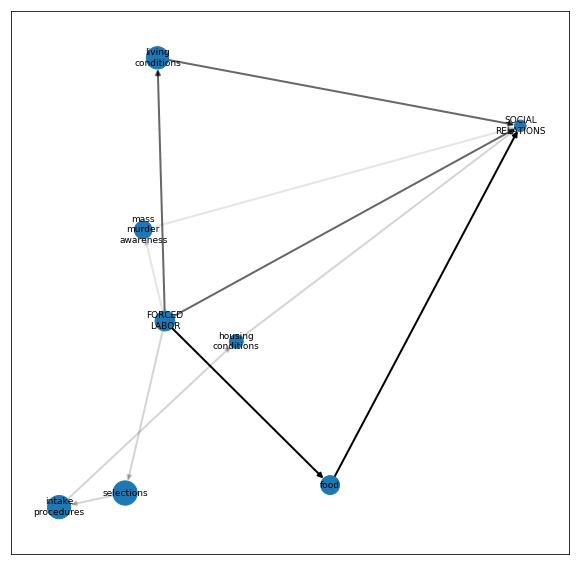

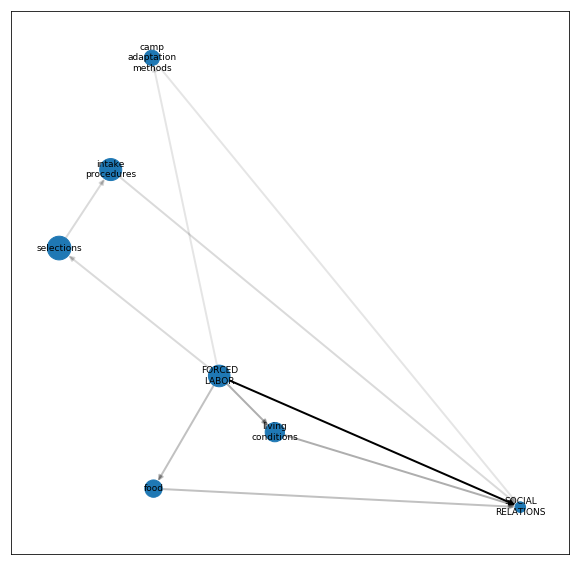

In [749]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 5

### Qualitative description

In narratives of both women and men, the discussion of friendship tends to be preceded by the discussion of living environments and housing conditions, as well as of forced labor. For women,  the discussion of friendship in the context of living environment is slightly stronger.

Furthermore in case of women (7.1%), more traffic is going through the following path than in case of men 4.9%:

living conditions-friends


Furthermore in case of women (1.13%), more traffic is going through the following path than in case of men (0.8%):

living conditions-aid giving-friends

The same cannot be said about forced labor, which is equally likely to preced friendship for both men and women.


## Visualization

In [354]:
story_start = 'arrival'
story_end = 'friends'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-intake procedures-living conditions-friends
6.591571087747801
arrival-selections-friends
5.346033588653356
arrival-intake procedures-friends
4.997179746503227
arrival-intake procedures-living conditions-forced labor-friends
4.590098569288088
arrival-loved ones' separations-intake procedures-housing conditions-Appell-food-friends
3.7031378393399015
arrival-selections-camp adaptation methods-friends
3.5523115318884244
arrival-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-friends
2.816828785320058
arrival-intake procedures-living conditions-selections-Mengele, Josef-friends
2.642473813467211
arrival-loved ones' separations-intake procedures-mass murder awareness-friends
2.5277662752212975
arrival-selections-intake procedures-Appell-friends
2.161200306069866
arrival-intake procedures-prisoner tattoos (stills)-friends
2.1529641573491927
arrival-selections-intake procedures-housing conditions-social relations-friends
2.

Path flux		%path	%of total	path
arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-friends
4.6700075871564675
arrival-selections-intake procedures-living conditions-friends
4.65631175902422
arrival-selections-friends
4.2474634135366065
arrival-intake procedures-prisoner tattoos (stills)-mass murder awareness-friends
3.9316874149390997
arrival-selections-intake procedures-living conditions-camp adaptation methods-friends
3.216155454739143
arrival-selections-intake procedures-friends
3.121548792940986
arrival-intake procedures-food-friends
2.8029366213693416
arrival-selections-intake procedures-housing conditions-Appell-family interactions-friends
2.8017270647430075
arrival-intake procedures-forced labor-politico-military event awareness-friends
2.7992099788865463
arrival-loved ones' separations-intake procedures-living conditions-food-selections-twins in the camps-friends
2.592301765774826
arrival-selections-departure-transfer conditions-transfer corpses-Holocau

Calculate for women

In [355]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])
print (np.array(result).sum())

arrival-intake procedures-living conditions-forced labor-friends
4.590098569288088


4.590098569288088


Calculate for men

In [356]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])
print (np.array(result).sum())

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-friends
4.6700075871564675


4.6700075871564675


In [357]:
result = []

for path in flux_w:
    if len(path.split('living conditions-friends'))>1 or len(path.split('housing conditions-friends'))>1 or len(path.split('camp barracks-friends'))>1 :
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-friends
6.591571087747801


arrival-Mengele, Josef-intake procedures-housing conditions-friends
1.6297780786235636


arrival-family interactions-loved ones' fates-intake procedures-camp barracks-friends
0.5950415997564671


arrival-injuries (stills)-post-conflict medical problems-food-selections-intake procedures-camp barracks-friends
0.015434083910216235


arrival-adaptation methods-forced labor-food-selections-intake procedures-camp barracks-friends
0.0005584160404012229


arrival-clothing-housing conditions-Appell-selections-intake procedures-camp barracks-friends
0.00014533770358999976


8.83252860378204


Calculate for men

In [358]:
result = []

for path in flux_m:
    if len(path.split('living conditions-friends'))>1 or len(path.split('housing conditions-friends'))>1 or len(path.split('camp barracks-friends'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-friends
4.65631175902422


arrival-selections-intake procedures-housing conditions-friends
2.4488678540066577


arrival-non-Jewish kapos-Jewish kapos-departure-freight trains-intake procedures-camp barracks-friends
0.07215246803722167


arrival-personnel-forced labor-food-camp adaptation methods-intake procedures-camp barracks-friends
0.007113622763331744


arrival-Soviet soldiers-Jewish soldiers-post-conflict return journeys-shelter provision-temporary identity concealment-farms-working life-future message-loved ones' introductions-Jewish prayers-selections-intake procedures-camp barracks-friends
0.004436835677341907


arrival-Yiddish (language)-prisoner tattoos-prisoner tattoos (stills)-living conditions-Appell-selections-intake procedures-camp barracks-friends
0.0017740970185777464


7.19065663652735


In [414]:
story_start = 'living conditions'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Path flux		%path	%of total	path
living conditions-friends
7.186269105921992
living conditions-selections-friends
5.262289350675571
living conditions-forced labor-friends
4.607510882266444
living conditions-food-friends
3.7173273244734077
living conditions-Appell-food-selections-intake procedures-friends
3.23971759407083
living conditions-camp adaptation methods-friends
2.8453985144436293
living conditions-mass murder awareness-friends
2.5209746424493553
living conditions-selections-intake procedures-housing conditions-Appell-friends
2.1644115948430773
living conditions-departure-transfer conditions-friends
1.8270577039507416
living conditions-social relations-friends
1.5679830010984703
living conditions-Appell-selections-intake procedures-prisoner tattoos (stills)-friends
1.566665415617015
living conditions-Blockälteste-friends
1.4764293699083901
living conditions-Mengele, Josef-friends
1.306570336794467
living conditions-sanitary conditions-friends
1.2074936885561633
living conditions

In [413]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Path flux		%path	%of total	path
living conditions-friends
4.987467244255548
living conditions-forced labor-friends
4.670050054392488
living conditions-selections-friends
4.181861662662014
living conditions-mass murder awareness-friends
3.912162182837562
living conditions-camp adaptation methods-friends
3.213141994177019
living conditions-selections-intake procedures-friends
3.066424783882239
living conditions-food-friends
2.806933358478007
living conditions-food-selections-Mengele, Josef-friends
2.445135428129225
living conditions-Roma prisoners-friends
1.7794726806757948
living conditions-Appell-selections-intake procedures-housing conditions-friends
1.6916464487226945
living conditions-departure-transfer to camps-friends
1.685879007842072
living conditions-loved ones' fates-intake procedures-prisoner tattoos-friends
1.566797544566473
living conditions-prisoner tattoos (stills)-forced labor-politico-military event awareness-friends
1.5470608308802385
living conditions-departure-friend

In [735]:
tory_start = 'forced labor'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

Path flux		%path	%of total	path
forced labor-friends
5.134709271710951
forced labor-living conditions-friends
4.58630255357244
forced labor-food-selections-friends
4.135124894064177
forced labor-camp adaptation methods-friends
3.564932038139334
forced labor-selections-intake procedures-friends
3.473753718465416
forced labor-aid giving-friends
2.824656067748445
forced labor-mass murder awareness-friends
2.515296283608584
forced labor-Appell-food-friends
1.9810860620525863
forced labor-departure-transfer conditions-friends
1.6642457692619328
forced labor-Mengele, Josef-friends
1.5912586539514626


In [736]:
tory_start = 'living conditions'
story_end = 'friends'
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

Path flux		%path	%of total	path
forced labor-friends
4.946899219077014
forced labor-living conditions-friends
4.212062291271698
forced labor-selections-friends
3.0927842517533075
forced labor-food-friends
2.8041334351583886
forced labor-camp adaptation methods-friends
2.6400307313595426
forced labor-mass murder awareness-friends
2.1502372877645426
forced labor-food-selections-intake procedures-friends
2.146742193006133
forced labor-aid giving-selections-Mengele, Josef-friends
1.8517590897038603
forced labor-politico-military event awareness-friends
1.5356335795236236
forced labor-family interactions-friends
1.5325285020280377
forced labor-departure-transfer to camps-friends
1.4341040046363425
forced labor-Appell-food-departure-friends
1.2579384694084443
forced labor-prisoner tattoos (stills)-living conditions-selections-intake procedures-housing conditions-friends
1.2069847006971217


5 labels to show
8 labels to show


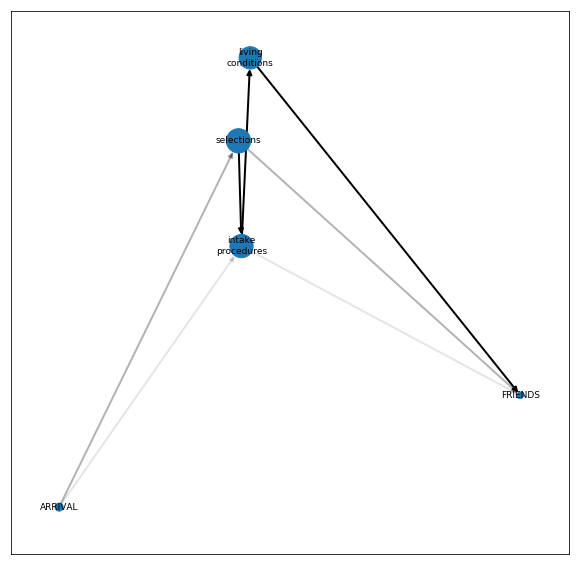

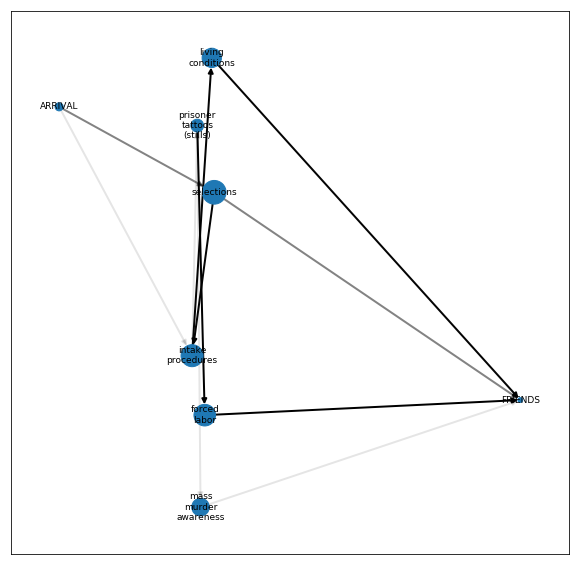

In [359]:
flux = 0.16
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 6

### Qualitative description

Women are more likely to discuss housing conditions following friendship than man do. No significant difference can be found in terms of forced labour.

## Visualization

In [360]:
story_start = 'friends'
story_end = 'departure'
flux = 0.3
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
friends-selections-departure
5.955928507872722
friends-food-selections-intake procedures-living conditions-departure
3.558783321055108
friends-camp adaptation methods-departure
3.5153708375958646
friends-departure
2.8678412611674506
friends-forced labor-departure
2.782018710473601
friends-living conditions-selections-transfer to camps-departure
2.53109801932469
friends-Appell-selections-transfer procedures-departure
2.3794166654253375
friends-prisoner tattoos (stills)-living conditions-selections-intake procedures-mass murder awareness-departure
2.1747949186461724
friends-housing conditions-Appell-food-selections-intake procedures-living conditions-transfer procedures-departure
2.154678640599962
friends-social relations-departure
1.9864867065654603
friends-intake procedures-housing conditions-food-departure
1.9112491106106593


Path flux		%path	%of total	path
friends-selections-departure
4.637642045794219
friends-mass murder awareness-departure
3.3681968

Calculate for women

In [361]:
result = []

for path in flux_w:
    if len(path.split('friends-forced labor-'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

2.782018710473601


Calculate for men

In [362]:
result = []

for path in flux_m:
    if len(path.split('friends-forced labor-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

2.3717404140116094


In [363]:
result = []

for path in flux_w:
    if len(path.split('friends-living conditions-'))>1 or len(path.split('friends-housing conditions-'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

4.685776659924652


Calculate for men

In [364]:
result = []

for path in flux_m:
    if len(path.split('friends-living conditions-'))>1 or len(path.split('friends-housing conditions-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

1.9836312566283467


In [423]:
story_start = 'friends'
story_end = 'departure'

8 labels to show
11 labels to show


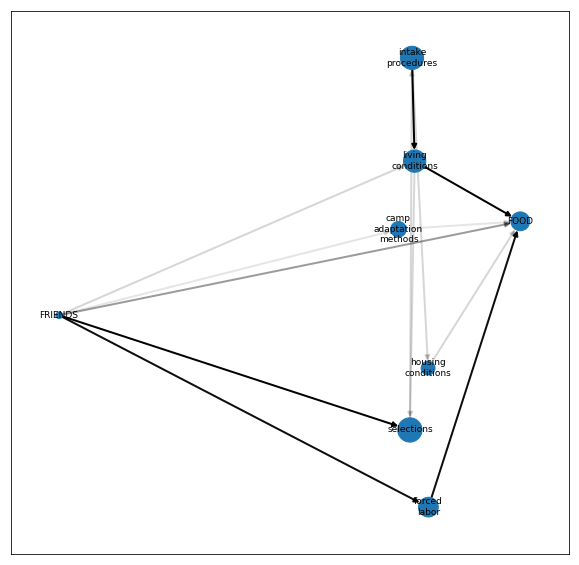

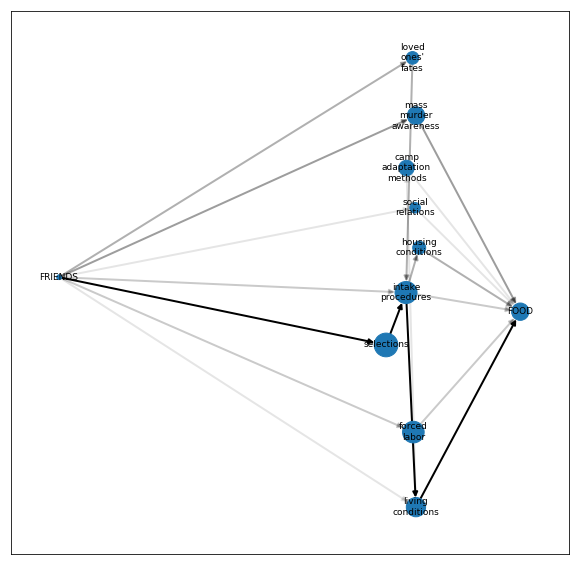

In [429]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 7

## Qualitative description

If we look at all possible narrative pathways that can connect arrival to and departure from Birkenau, we can see that a significant amount of traffic is going through aid giving  and social bonds. Their significance can be understood if they are compared to Appel. The amount of traffic going through friendship  and food sharing is less significant. 

In case of women, more traffic is going through these nodes, with an exception of aid giving:

•    social bonds: 3.47 %

•    aid giving: 2.46 %

•    friendship: 0.85 $

•    food sharing: 0.35 %

In case of men, less traffic is going through these nodes:

•.	 social bonds: 2.46 %

•    aid giving: 2.6 %

•    friendship: 0.24 %

•    food sharing: 0.29 %

#### Total traffic going through them in the complete dataset (men and women):

In [367]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_complete = calculate_flux(data_set_1_complete,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_complete_dataset_2 = calculate_flux(data_set_2_complete,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-departure
7.006485320496325
arrival-intake procedures-living conditions-departure
4.846820896097258
arrival-selections-intake procedures-mass murder awareness-departure
2.7240125401032094
arrival-selections-intake procedures-living conditions-forced labor-departure
2.5996895184209734
arrival-intake procedures-housing conditions-Appell-food-departure
2.550858024621911
arrival-selections-transfer to camps-departure
2.4209002034835465
arrival-selections-camp adaptation methods-departure
2.2738833291695157
arrival-selections-transfer procedures-departure
2.164894351602214
arrival-selections-loved ones' fates-departure
1.7244913283563486
arrival-intake procedures-Appell-departure
1.7095683633583099
arrival-loved ones' separations-intake procedures-living conditions-transfer procedures-departure
1.6763898291479178
arrival-intake procedures-living conditions-camp adaptation methods-departure
1.3870337080444417
arrival-loved ones' separations-

Calculate the total traffic going through social bonds

In [368]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []
total_escapes = []

In [369]:
for i,element in enumerate(flux_complete):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_complete[element])
print(np.array(total_social_bonds).sum())

2.9361759723023995


Calculate the total traffic going through aid giving

In [370]:
for i,element in enumerate(flux_complete):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_complete[element])
print(np.array(total_aid_giving).sum())

2.6717827843064574


Calculate the total traffic going through Appell

In [371]:
for i,element in enumerate(flux_complete):
    if 'Appell' in element.split('-'):
        total_appell.append(flux_complete[element])
print(np.array(total_appell).sum())

12.190907134349045


Calculate the total traffic going through escape

In [372]:
for i,element in enumerate(flux_complete):
    if 'escapes' in element.split('-'):
        total_escapes.append(flux_complete[element])
print(np.array(total_escapes).sum())

0.03714920335464339


Calculate the total traffic going through friendship

In [373]:
for i,element in enumerate(flux_complete):
    if 'friends' in element.split('-'):
        total_friends.append(flux_complete[element])
print(np.array(total_friends).sum())

0.5376218614701348


Calculate the total traffic going through food sharing

In [374]:
for i,element in enumerate(flux_complete):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_complete[element])
print(np.array(total_food_sharing).sum())

0.3785032595815108


#### Total traffic going through them in the dataset of women

In [375]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_w_dataset_2 = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-departure
7.517200999471624
arrival-intake procedures-living conditions-departure
4.858038065703759
arrival-intake procedures-living conditions-forced labor-departure
2.749742512225775
arrival-selections-transfer procedures-departure
2.6039435889197016
arrival-selections-transfer to camps-departure
2.5456843106327636
arrival-selections-camp adaptation methods-departure
2.4313960757206736
arrival-intake procedures-mass murder awareness-departure
2.2874165231578174
arrival-loved ones' separations-intake procedures-living conditions-transfer procedures-departure
2.1203030242807595
arrival-intake procedures-Appell-food-departure
1.9280550915977268
arrival-aid giving-departure
1.5051036405982332
arrival-loved ones' separations-intake procedures-family interactions-departure
1.4407891815116984
arrival-extended family members-departure
1.418156822738129
arrival-intake procedures-housing conditions-Appell-departure
1.3891395538715132
arrival-M

In [376]:
len(flux_w)

591

In [377]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []

Calculate the total traffic going through social bonds

In [378]:
for i,element in enumerate(flux_w):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_w[element])
print(np.array(total_social_bonds).sum())

3.474288919133106


Calculate the total traffic going through aid giving

In [379]:
for i,element in enumerate(flux_w):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_w[element])
print(np.array(total_aid_giving).sum())

2.4642121645175594


Calculate the total traffic going through friendship

In [380]:
for i,element in enumerate(flux_w):
    if 'friends' in element.split('-'):
        total_friends.append(flux_w[element])
print(np.array(total_friends).sum())

0.858955786462983


Calculate the total traffic going through food sharing

In [381]:
for i,element in enumerate(flux_w):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_w[element])
        #print (element)
        #print (flux_w[element])
print(np.array(total_food_sharing).sum())

0.35292251677209735


#### Total traffic going through them in the dataset of men

In [382]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_m_dataset_2 = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-departure
5.316158044987187
arrival-selections-intake procedures-living conditions-departure
4.62752282695804
arrival-selections-intake procedures-food-departure
3.5163304225769694
arrival-mass murder awareness-departure
3.1987488206226544
arrival-intake procedures-prisoner tattoos (stills)-forced labor-departure
2.375006795406318
arrival-selections-intake procedures-living conditions-camp adaptation methods-departure
2.2599867508906004
arrival-selections-intake procedures-housing conditions-Appell-departure
2.1937653441767564
arrival-selections-camp adaptation methods-departure
2.078152699703643
arrival-selections-loved ones' fates-departure
1.8605985090762536
arrival-intake procedures-forced labor-politico-military event awareness-departure
1.5925257252239313
arrival-intake procedures-living conditions-food-camp adaptation methods-departure
1.522839723233611
arrival-selections-transfer to camps-departure
1.4843069438860215
arrival-in

In [383]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []



Calculate the total traffic going through social bonds

In [384]:
for i,element in enumerate(flux_m):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_m[element])
print(np.array(total_social_bonds).sum())

2.4630332857629655


Calculate the total traffic going through aid giving

In [385]:
for i,element in enumerate(flux_m):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_m[element])
print(np.array(total_aid_giving).sum())

2.582800743516971


Calculate the total traffic going through friendship

In [386]:
for i,element in enumerate(flux_m):
    if 'friends' in element.split('-'):
        total_friends.append(flux_m[element])
print(np.array(total_friends).sum())

0.2462599967198602


Calculate the total traffic going through food sharing

In [387]:
total_food_sharing = []

In [388]:
for i,element in enumerate(flux_m):
    if 'food sharing' in element.split('-'):
        #print (element)
        #print (flux_m[element])
        total_food_sharing.append(flux_m[element])
print(np.array(total_food_sharing).sum())

0.2926940919542161


## Observation 8

### Qualitative Description

In testimonies of women there are important narrative pathways that lead to the discussion of survival explanations and involve social bonds  as states preceding survival explanations; in testimonies of men such paths have significantly less traffic. We can see a similar pattern with friends. At the same time, in testimonies of men, aid giving is more likely to preceed survival explanation directly. However, in case of women a good amount of traffic is going through the following path that does not exist in testimonies of men:

aid giving-social relations-survival explanations
1.3752851611513381

There is no direct connection between social relations and survival explanations in testimonies of men.

In [402]:
story_start = 'arrival'
story_end = 'survival explanations'

In [409]:
flux = 0.4
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-survival explanations
5.651026443252306
arrival-intake procedures-living conditions-survival explanations
4.15096051691226
arrival-selections-intake procedures-living conditions-forced labor-survival explanations
3.555518701322224
arrival-intake procedures-mass murder awareness-survival explanations
3.1790893958825808
arrival-selections-camp adaptation methods-survival explanations
3.117198748966701
arrival-intake procedures-family interactions-survival explanations
2.7206210017797505
arrival-loved ones' separations-intake procedures-housing conditions-Appell-survival explanations
2.7086320963092487
arrival-selections-intake procedures-living conditions-diseases-survival explanations
2.3150440852749945
arrival-intake procedures-housing conditions-social relations-survival explanations
2.2547144300318784
arrival-loved ones' separations-intake procedures-living conditions-selections-departure-survival explanations
2.086868221090126
arriv

Find social bonds in women narratives

In [404]:
result = []
for path in flux_w:
    if len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-housing conditions-social relations-survival explanations
2.2547144300318784


arrival-intake procedures-living conditions-friends-survival explanations
0.9322997760921696


arrival-shoes-housing conditions-Appell-selections-intake procedures-living conditions-social relations-survival explanations
0.15472006819428497


arrival-emotions-psychological distress prevention-living conditions-social relations-survival explanations
0.03994543491265819


arrival-property seizure-prisoner tattoos (stills)-living conditions-selections-intake procedures-Appell-food-social relations-survival explanations
0.005337564867344182


arrival-SS/SD personnel-intake procedures-social relations-survival explanations
0.0003647416136984268


arrival-food acquisition-selections-intake procedures-social relations-survival explanations
8.969452305760493e-05


3.3874717102350917


Find aid giving in women narratives

In [405]:
result = []
for path in flux_w:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-survival explanations
2.032956399535339


2.032956399535339


Find social bonds in men narratives

In [406]:
result = []
for path in flux_m:
    if len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-loved ones' fates-intake procedures-food-selections-medical experiments-post-conflict medical problems-friends-survival explanations
0.6215828651848473


arrival-camp adaptation methods-departure-freight trains-selections-intake procedures-housing conditions-Appell-social relations-survival explanations
0.31219525142050947


arrival-interviewee memory-intake procedures-prisoner tattoos-forced labor-beatings-social relations-survival explanations
0.0938158448215383


1.027593961426895


Find aid giving in men narratives

In [407]:
result = []
for path in flux_m:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-camp adaptation methods-aid giving-survival explanations
1.9747229803809814


arrival-kapos-selections-intake procedures-prisoner tattoos-forced labor-aid giving-survival explanations
0.6391633927462611


arrival-Soviet armed forces-liberation-related aid giving-post-conflict medical problems-mass murder awareness-departure-freight trains-transfer conditions-intake procedures-housing conditions-social relations-aid giving-survival explanations
0.003175935867285176


2.6170623089945275


In [456]:
story_start = 'aid giving'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

In [459]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Path flux		%path	%of total	path
aid giving-selections-survival explanations
5.55566151805494
aid giving-selections-intake procedures-living conditions-survival explanations
4.121070102570779
aid giving-forced labor-survival explanations
3.5561139718303987
aid giving-intake procedures-mass murder awareness-survival explanations
3.1535945108074417
aid giving-camp adaptation methods-survival explanations
3.118721954413443
aid giving-living conditions-selections-intake procedures-housing conditions-Appell-survival explanations
2.695191407174198
aid giving-survival explanations
2.6696661754080866
aid giving-loved ones' separations-intake procedures-family interactions-survival explanations
2.197358472987517
aid giving-departure-survival explanations
2.090395792520972
aid giving-Mengele, Josef-survival explanations
2.0598757299505
aid giving-Appell-food-selections-departure-transfer to camps-survival explanations
1.875163698205767
aid giving-food-selections-intake procedures-psychological re

In [460]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.2)

Path flux		%path	%of total	path
aid giving-selections-survival explanations
4.9666939897010005
aid giving-survival explanations
3.8067494674128137
aid giving-intake procedures-living conditions-departure-survival explanations
3.7262416160873
aid giving-forced labor-survival explanations
3.530908137470878
aid giving-selections-loved ones' fates-survival explanations
3.134778336986404
aid giving-forced labor-food-selections-intake procedures-living conditions-survival explanations
3.0477125348154397


## Visualize


Notice that social bonds are "missing" from the plot showing men

8 labels to show
9 labels to show


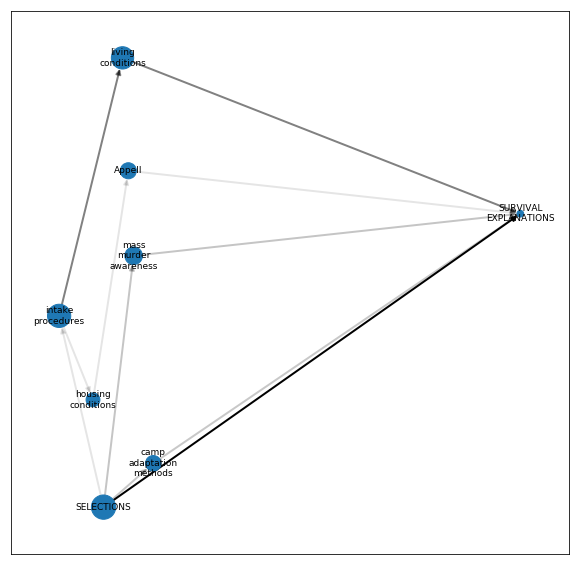

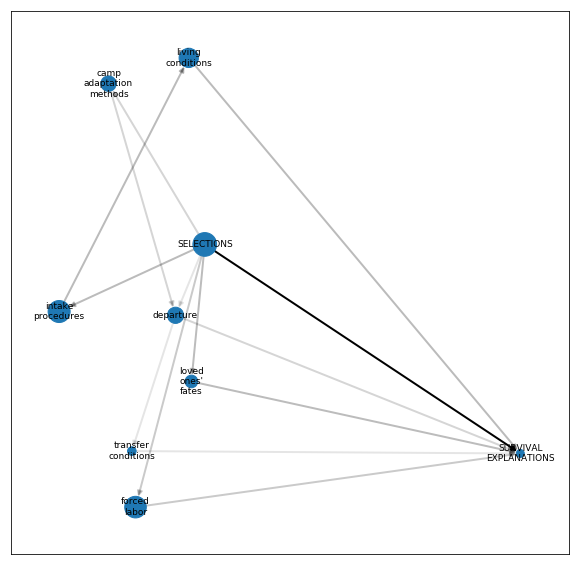

In [490]:
flux = 0.18
res=visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 9

### Qualitative description

The moment when one particularly needed the help of others was the selection, when the ill and those who were unable to work were selected to be sent to gas chambers. In testimonies we can often read that victims helped each other in these moments (for instance by hiding or holding the ill); yet victims attribute their survival of selections to the help of their peers and friends. This narrative frame corresponds to the following narrative pathways:
- selections-social relations-survival explanations
- selections-friends-survival explanations
- selections-aid giving-survival explanations

These narrative pathways are more significant in testimonies of women than men.


### Visualization

In [463]:
story_start = 'selections'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
selections-survival explanations
5.995184312276154
selections-intake procedures-living conditions-survival explanations
4.143857046877247
selections-mass murder awareness-survival explanations
3.173479388072827
selections-camp adaptation methods-survival explanations
3.128705235997654
selections-intake procedures-housing conditions-Appell-survival explanations
2.7010425799106135
selections-forced labor-survival explanations
2.4896536090004644
selections-departure-survival explanations
2.0950944274709076
selections-Mengele, Josef-survival explanations
2.0696456754813872
selections-transfer to camps-survival explanations
1.8855884250056718
selections-family interactions-survival explanations
1.6772151795477122
selections-aid giving-survival explanations
1.372566897382252
selections-intake procedures-Appell-food-survival explanations
1.2750570775887082
selections-transfer procedures-departure-transfer conditions-survival explanations
1.0947698761400633
sele

Path flux		%path	%of total	path
selections-survival explanations
5.573167275281716
selections-intake procedures-living conditions-survival explanations
3.086478573024149
selections-loved ones' fates-survival explanations
3.0820476962530226
selections-forced labor-survival explanations
2.8992043876019356
selections-camp adaptation methods-departure-survival explanations
2.7421626249697253
selections-departure-transfer conditions-survival explanations
2.526322047079005
selections-living conditions-departure-transfer to camps-survival explanations
1.9272218380904393
selections-extended family members-survival explanations
1.5864538159305857
selections-intake procedures-food-survival explanations
1.5333992527924132
selections-intake procedures-prisoner tattoos (stills)-survival explanations
1.4183532062719062
selections-Mengele, Josef-survival explanations
1.2831720816827197
selections-intake procedures-prisoner tattoos-survival explanations
1.1050606297533445
selections-intake procedures-

9 labels to show
10 labels to show


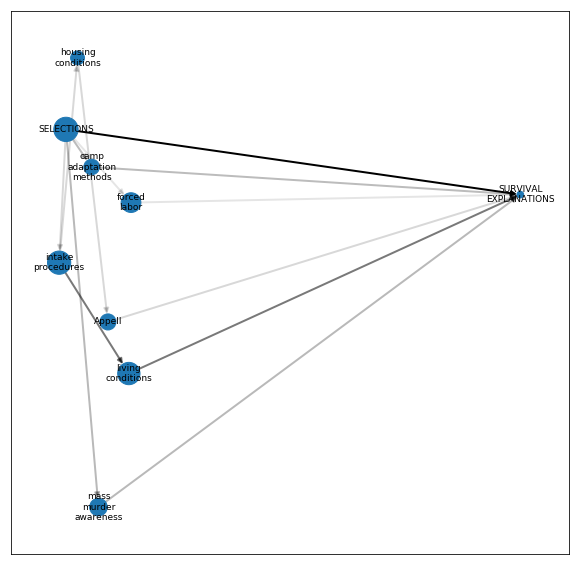

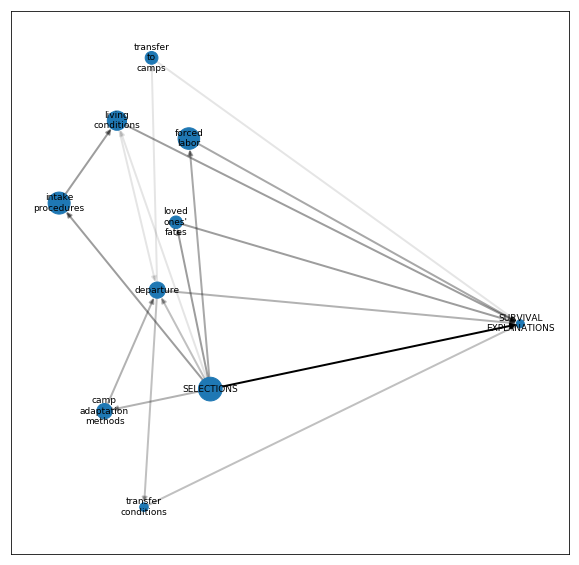

In [502]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,['selections'],story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,['selections'],story_end,None)

Find social bonds as transitionary topic between selection and survival explanation in narratives of women

In [398]:
total = []
for path in flux_w:
    if (len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1):
        if len(path.split('-'))==3:
            print (path)
            print (flux_w[path])
            total.append(flux_w[path])
            print ('\n')
print (np.array(total).sum())

selections-social relations-survival explanations
0.8517907825853956


selections-friends-survival explanations
0.4084233290441179


1.2602141116295136


Find social bonds as transitionary topic between selection and survival explanation in narratives of men

In [399]:
total = []
for path in flux_m:
    if (len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1):
        if len(path.split('-'))==3:
            print (path)
            print (flux_m[path])
            total.append(flux_m[path])
            print ('\n')
print (np.array(total).sum())

selections-friends-survival explanations
0.22597524390714183


0.22597524390714183


Find aid giving as transitionary topic between selection and survival explanation in narratives of women

In [400]:
total = []
for path in flux_w:
    if (len(path.split('-aid giving-survival explanations')))>1:
        if len(path.split('-'))==3:
            print (path)
            print (flux_w[path])
            total.append(flux_w[path])
            print ('\n')
print (np.array(total).sum())

selections-aid giving-survival explanations
1.372566897382252


1.372566897382252


Find aid giving as transitionary topic between selection and survival explanation in narratives of men

In [464]:
total = []
for path in flux_m:
    if (len(path.split('-aid giving-survival explanations')))>1:
        if len(path.split('-'))==3:
            print (path)
            print (flux_m[path])
            total.append(flux_m[path])
            print ('\n')
print (np.array(total).sum())

selections-aid giving-survival explanations
0.9130792244020753


0.9130792244020753


## Observation 10

### Qualitative description

some text hebre


In [541]:
flux = 0.27
story_start = 'social relations'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
social relations-selections-aid giving
5.371886618798146
social relations-aid giving
5.197347732237376
social relations-food-selections-intake procedures-living conditions-forced labor-aid giving
3.9198910908624622
social relations-living conditions-aid giving
3.2443759794384
social relations-camp adaptation methods-aid giving
3.2284443490518653
social relations-forced labor-aid giving
2.8948768437334533
social relations-mass murder awareness-aid giving
2.846868521229434
social relations-Appell-food-aid giving
2.605992120888735


Path flux		%path	%of total	path
social relations-aid giving
7.363992537011043
social relations-forced labor-aid giving
6.7009466811388885
social relations-camp adaptation methods-aid giving
4.215922136512684
social relations-selections-aid giving
3.350525385527081
social relations-mass murder awareness-aid giving
2.398991864027975
social relations-food-selections-intake procedures-aid giving
2.3027280630823594
social relations-l

Path flux		%path	%of total	path
social relations-selections-aid giving
5.371886618798146
social relations-aid giving
5.197347732237376
social relations-food-selections-intake procedures-living conditions-forced labor-aid giving
3.9198910908624622
social relations-living conditions-aid giving
3.2443759794384
social relations-camp adaptation methods-aid giving
3.2284443490518653
social relations-forced labor-aid giving
2.8948768437334533
social relations-mass murder awareness-aid giving
2.846868521229434
social relations-Appell-food-aid giving
2.605992120888735


Path flux		%path	%of total	path
social relations-aid giving
7.363992537011043
social relations-forced labor-aid giving
6.7009466811388885
social relations-camp adaptation methods-aid giving
4.215922136512684
social relations-selections-aid giving
3.350525385527081
social relations-mass murder awareness-aid giving
2.398991864027975
social relations-food-selections-intake procedures-aid giving
2.3027280630823594
social relations-l

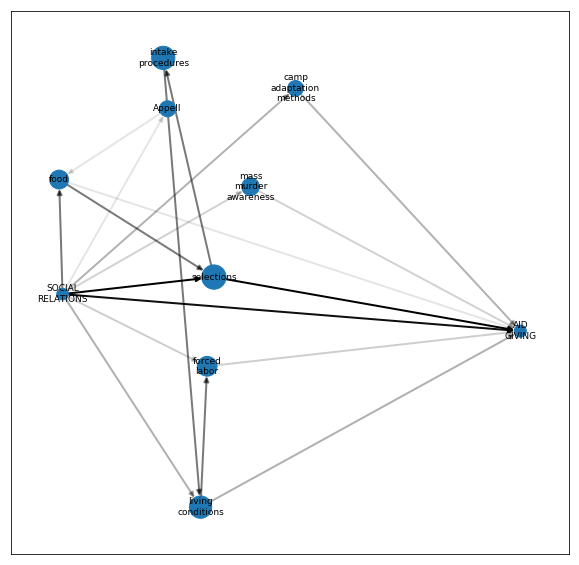

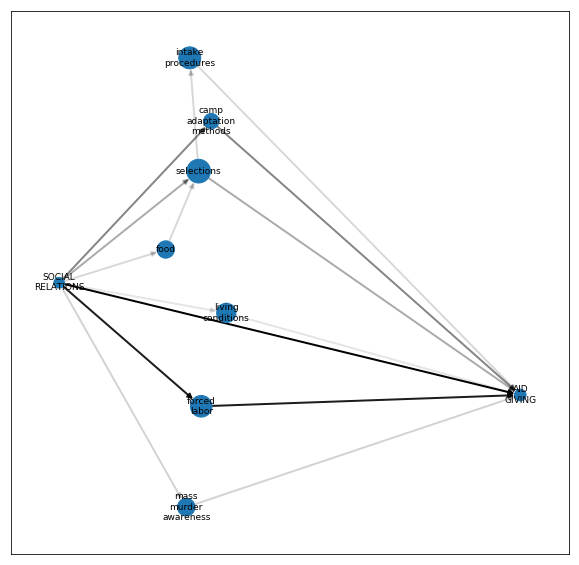

In [561]:
story_start = ['social relations']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 11

Friendship and aid giving are closely connected in narratives of women and they are not closely connected in narratives of men.

Path flux		%path	%of total	path
friends-forced labor-aid giving
6.707407115489016
friends-selections-aid giving
5.427121616259672
friends-camp adaptation methods-aid giving
3.3758016317748982
friends-food-selections-intake procedures-living conditions-aid giving
3.285652499639901
friends-living conditions-selections-intake procedures-housing conditions-Appell-food-aid giving
2.9691335294840373
friends-prisoner tattoos (stills)-living conditions-selections-intake procedures-mass murder awareness-aid giving
2.859010546382883
friends-social relations-aid giving
2.5252273920475585
friends-Appell-aid giving
2.0022463998537554
friends-aid giving
1.9789089838040406


Path flux		%path	%of total	path
friends-selections-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
5.519795228128627
friends-loved ones' fates-intake procedures-living conditions-camp adaptation methods-aid giving
4.185595035077157
friends-mass murder awareness-forced labor-food-selections-aid giving
3.3693980

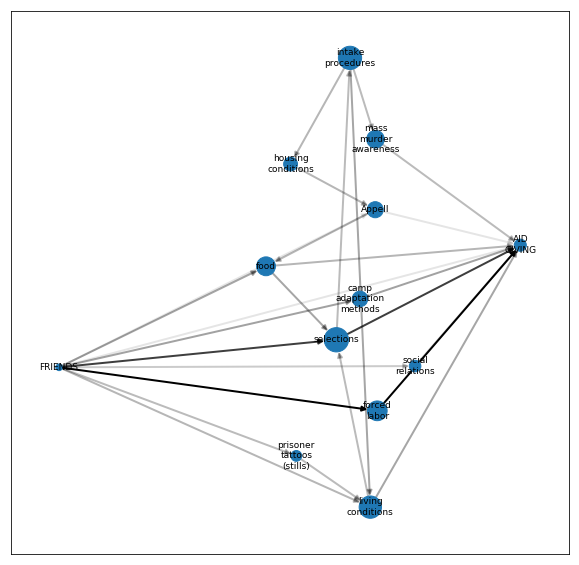

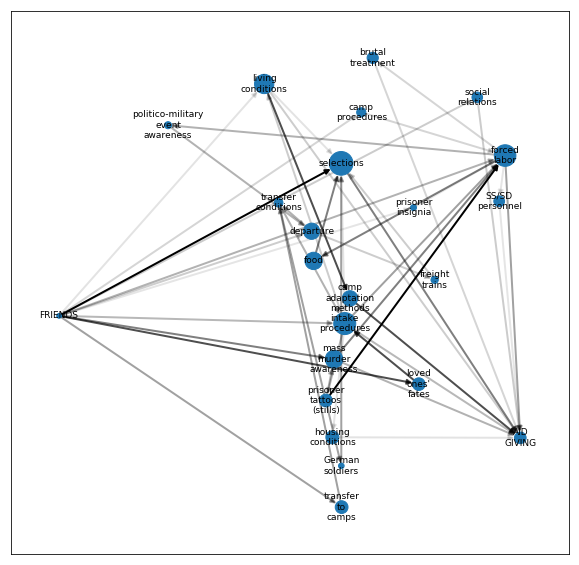

In [564]:
flux = 0.3
story_start = 'friends'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

flux = 0.3
story_start = ['friends']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

In [570]:
calculate_mfpt(data_set_1_w,story_start,story_end,features_df.KeywordLabel.to_list())

[312]
109.98579676402434


In [571]:
calculate_mfpt(data_set_1_m,story_start,story_end,features_df.KeywordLabel.to_list())

[294]
119.89903085153654


## Observation 12

Hunger and friendship are closely connected for women. Hunger and food sharing are closely connected in narratives of women.

12 labels to show
23 labels to show


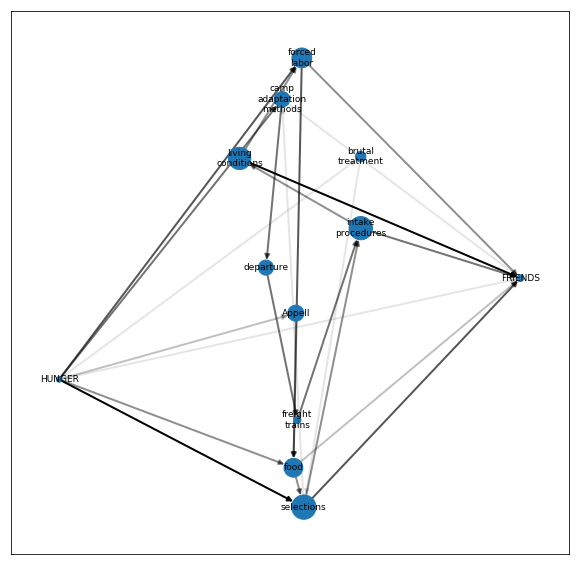

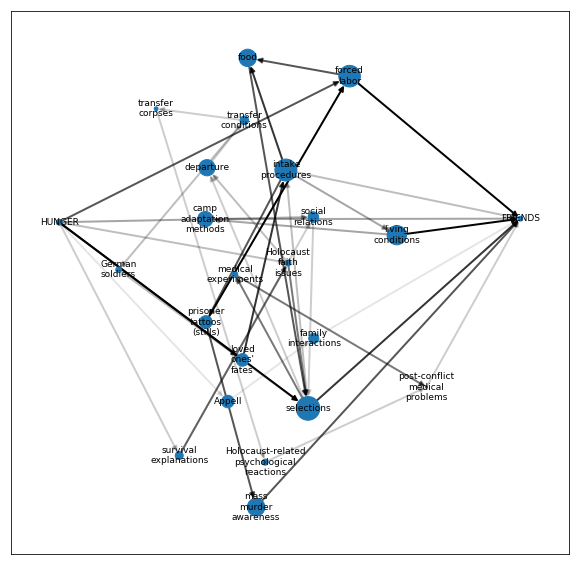

In [622]:
flux = 0.3

story_start = ['hunger']
story_end = ['friends']
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

In [624]:
flux = 0.6
story_start = 'hunger'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
hunger-selections-intake procedures-living conditions-friends
6.470255219708833
hunger-forced labor-food-selections-friends
5.202561550577335
hunger-camp adaptation methods-departure-freight trains-intake procedures-friends
4.783326069506598
hunger-food-selections-intake procedures-living conditions-forced labor-friends
4.368930222744373
hunger-Appell-food-friends
3.6659671459385703
hunger-friends
3.10562544711327
hunger-brutal treatment-selections-camp adaptation methods-friends
3.1005742664641405
hunger-family interactions-selections-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-friends
2.7744207443823967
hunger-food acquisition-selections-Mengele, Josef-friends
2.5762497652784497
hunger-punishments-selections-intake procedures-mass murder awareness-friends
2.4798576343769
hunger-living conditions-selections-intake procedures-housing conditions-Appell-friends
2.1360992210121825
hunger-beatings-selections-intake procedures-prisoner

In [608]:
calculate_mfpt(data_set_1_w,['hunger'],['friends'],features_df.KeywordLabel.to_list())

[353]
380.74218911911964


In [608]:
calculate_mfpt(data_set_1_w,['hunger'],['friends'],features_df.KeywordLabel.to_list())

[353]
380.74218911911964


In [618]:
calculate_mfpt(data_set_1_w,['hunger'],['food sharing'],features_df.KeywordLabel.to_list())

[353]
443.39235172465095


In [617]:
calculate_mfpt(data_set_1_m,['hunger'],['food sharing'],features_df.KeywordLabel.to_list())

[327]
520.7403703605504


## Observation 13

In narratives of those men and women who did not work, friendship and survival explanations are more connected for women

In [815]:
flux = 0.3
story_start = 'friends'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
friends-living conditions-camp adaptation methods-survival explanations
5.830730454265052
friends-Appell-survival explanations
5.219393758894051
friends-mass murder awareness-housing conditions-food-selections-survival explanations
4.439077178947994
friends-selections-intake procedures-mass murder awareness-survival explanations
3.94667844027636
friends-survival explanations
3.820611836128484
friends-intake procedures-living conditions-diseases-survival explanations
3.071878042857603
friends-camp adaptation methods-departure-transfer to camps-survival explanations
3.0167243162589914
friends-loved ones' separations-intake procedures-Appell-food-Mengele, Josef-survival explanations
3.000703449652853


Path flux		%path	%of total	path
friends-camp adaptation methods-departure-survival explanations
7.371877006990826
friends-prisoner tattoos (stills)-living conditions-departure-survival explanations
6.4484728549299275
friends-mass murder awareness-selections-l

10 labels to show
10 labels to show


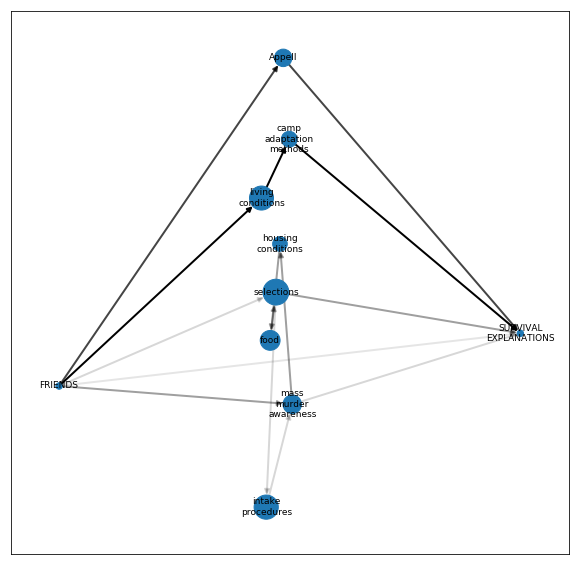

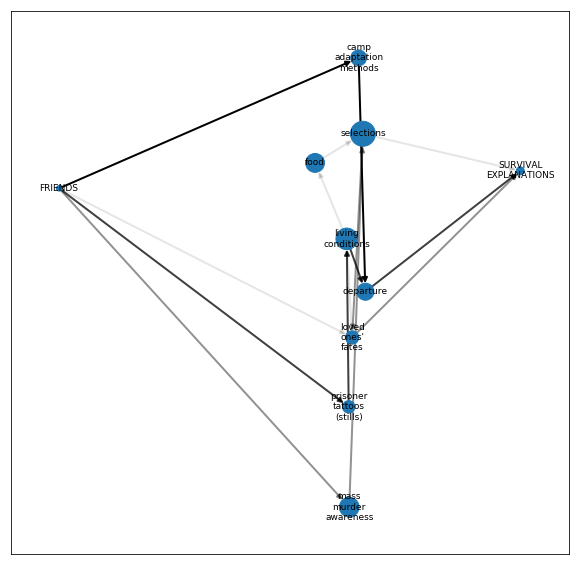

In [657]:

story_start = ['friends']
story_end = ['survival explanations']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

## Observation 14 A

In narratives of those men and women who did not work, social relations and living conditions are much more connected for women:

living conditions - social relations

For women 9.9% of total traffic is going through this path, whereas for men, it is 5.8%.

In [751]:
flux = 0.6
story_start = 'living conditions'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
living conditions-social relations
9.908706958389015
living conditions-food-social relations
6.056736616991865
living conditions-selections-social relations
3.6483120763775254
living conditions-selections-intake procedures-housing conditions-social relations
3.5439527346500843
living conditions-Appell-social relations
3.2490721255108292
living conditions-mass murder awareness-social relations
3.1187452875539665
living conditions-family interactions-social relations
1.8597086347922522
living conditions-departure-social relations
1.8532099317166828
living conditions-Appell-food-selections-intake procedures-social relations
1.7828919902438145
living conditions-camp adaptation methods-social relations
1.7532342673393646
living conditions-Mengele, Josef-social relations
1.6991780585590246
living conditions-sanitary conditions-social relations
1.622951630181198
living conditions-transfer to camps-social relations
1.466897799432286
living conditions-selections-

6 labels to show
7 labels to show


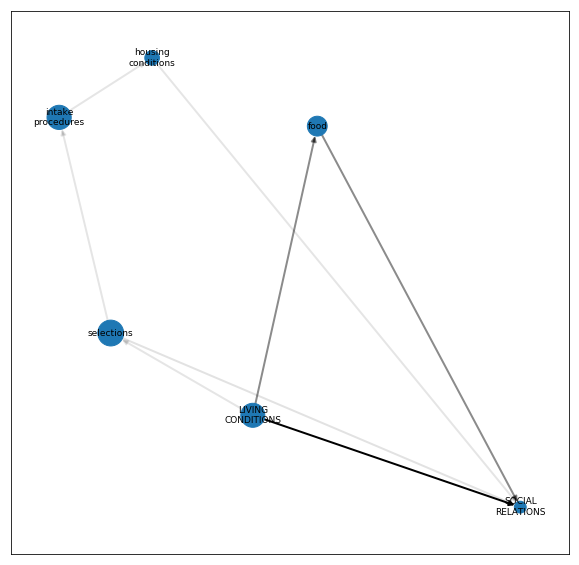

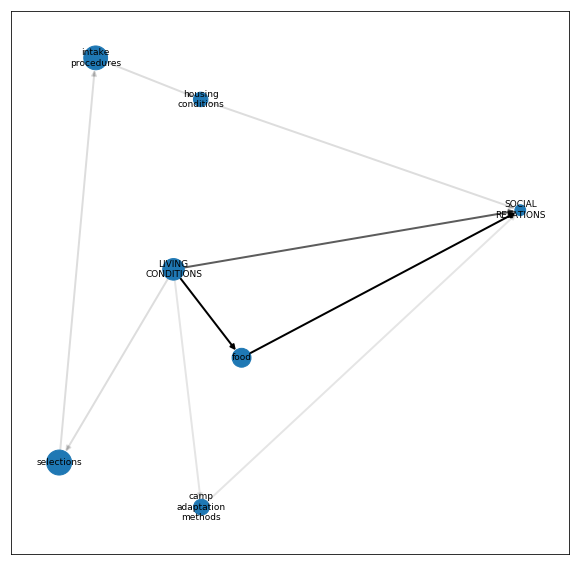

In [752]:

story_start = ['living conditions']
story_end = ['social relations']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

## Observation 14

In narratives of those men and women who did not work, friendship and living conditions are much more connected for women:

friends-living conditions

For women 6.7% of total traffic is going through this path, whereas for men, it is 1.5%.

In [662]:
flux = 0.6
story_start = 'friends'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
friends-living conditions
6.704612554824343
friends-mass murder awareness-living conditions
4.289429249173974
friends-Appell-living conditions
4.155420687383226
friends-selections-intake procedures-living conditions
4.021022100276521
friends-intake procedures-living conditions
3.7905030683044134
friends-loved ones' separations-intake procedures-living conditions
3.2013320796951086
friends-food-living conditions
2.8081658495238724
friends-Mengele, Josef-intake procedures-living conditions
2.620762935614495
friends-camp adaptation methods-living conditions
2.0250525605596748
friends-prisoner tattoos (stills)-living conditions
1.887432491383509
friends-transfer to camps-living conditions
1.678116991808845
friends-clothing-housing conditions-food-selections-living conditions
1.6619217573646476
friends-sanitary conditions-selections-living conditions
1.5478518256638463
friends-departure-living conditions
1.4934872678612015
friends-extended family members-inta

6 labels to show
7 labels to show


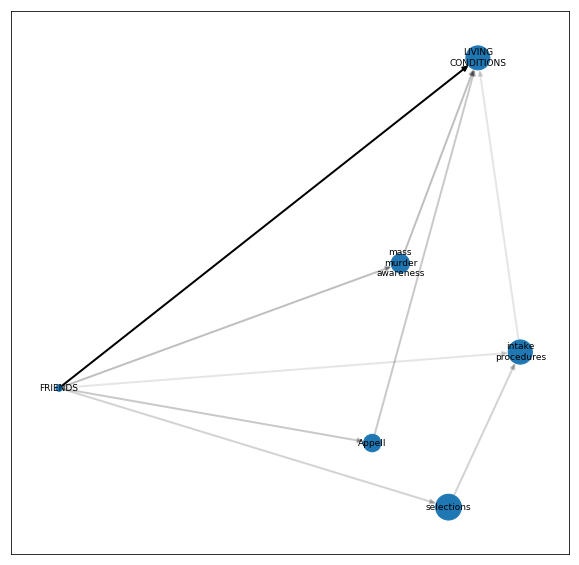

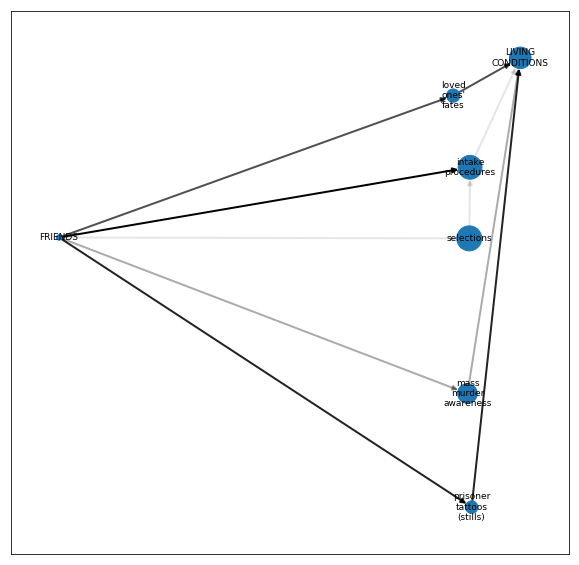

In [672]:

story_start = ['friends']
story_end = ['living conditions']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

## Observation 14 B

In narratives of those men and women who did not work, aid giving and living conditions are much more connected for women:

living conditions - aid giving

For women 7.4% of total traffic is going through this path, whereas for men, it is 3.36%.

In [769]:
flux = 0.3
story_start = 'living conditions'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
living conditions-food-stealing
6.364250469071793
living conditions-selections-intake procedures-Appell-stealing
6.321157978905537
living conditions-stealing
4.335615442875648
living conditions-Appell-food-selections-intake procedures-stealing
3.775507105494364
living conditions-camp adaptation methods-stealing
3.291595819381206
living conditions-departure-stealing
2.8313080864268363
living conditions-selections-intake procedures-housing conditions-stealing
2.5892610812265326
living conditions-family interactions-stealing
2.212051999259671


Path flux		%path	%of total	path
living conditions-stealing
30.402370724407824


5 labels to show
8 labels to show


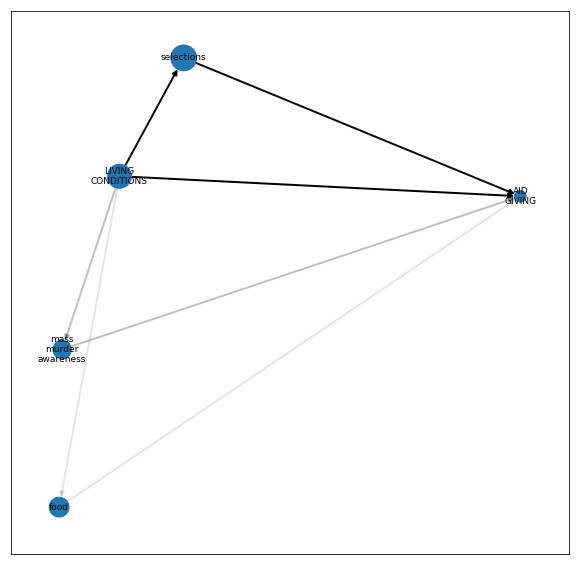

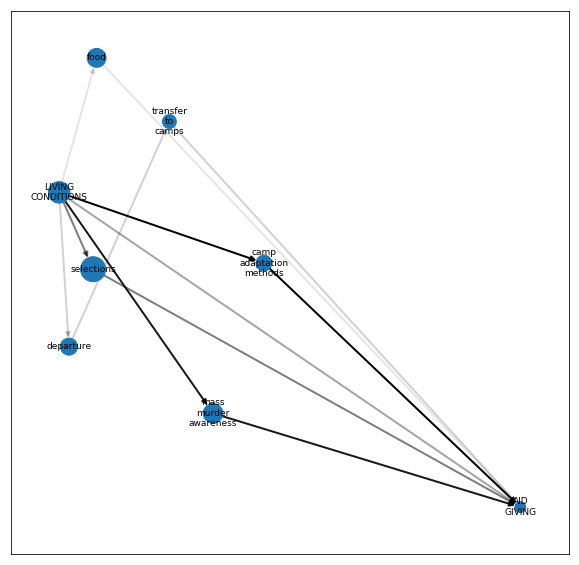

In [754]:
story_start = ['living conditions']
story_end = ['aid giving']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

## Observation 15

In narratives of those men and women who did not work, aid giving and survival explanations are much more connected for women:

aid giving-survival explanations


For women 1.8% of total traffic is going through this path, whereas for men, it is 0.7753%.

In [674]:
flux = 0.8
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
aid giving-selections-intake procedures-Appell-survival explanations
5.357180573056419
aid giving-selections-survival explanations
4.902150158539
aid giving-intake procedures-mass murder awareness-survival explanations
4.0012600939844996
aid giving-living conditions-camp adaptation methods-survival explanations
3.723999181430855
aid giving-camp adaptation methods-departure-transfer to camps-survival explanations
3.059972572448975
aid giving-mass murder awareness-housing conditions-food-Mengele, Josef-survival explanations
3.0489817952038205
aid giving-Mengele, Josef-intake procedures-Appell-food-selections-departure-survival explanations
2.974720342060313
aid giving-departure-transfer conditions-intake procedures-mass murder awareness-camp adaptation methods-survival explanations
2.193657413568099
aid giving-food-survival explanations
2.0999757771092895
aid giving-loved ones' separations-intake procedures-Blockälteste-survival explanations
2.087076392093

Path flux		%path	%of total	path
aid giving-selections-intake procedures-living conditions-departure-survival explanations
9.168350175220139
aid giving-intake procedures-food-selections-departure-survival explanations
5.5776251287777745
aid giving-camp adaptation methods-departure-transfer conditions-intake procedures-living conditions-selections-loved ones' fates-survival explanations
4.473544667926247
aid giving-selections-survival explanations
4.17033952161439
aid giving-living conditions-survival explanations
3.8023847065968392
aid giving-intake procedures-food-transfer to camps-survival explanations
3.3246346781810865
aid giving-food-social relations-selections-intake procedures-Appell-survival explanations
3.163812837811601
aid giving-loved ones' fates-living conditions-camp adaptation methods-intake procedures-housing conditions-kapos-survival explanations
2.628699110699038
aid giving-arrival-selections-transfer to camps-German concentration camps (generic)-survival explanations


8 labels to show
10 labels to show


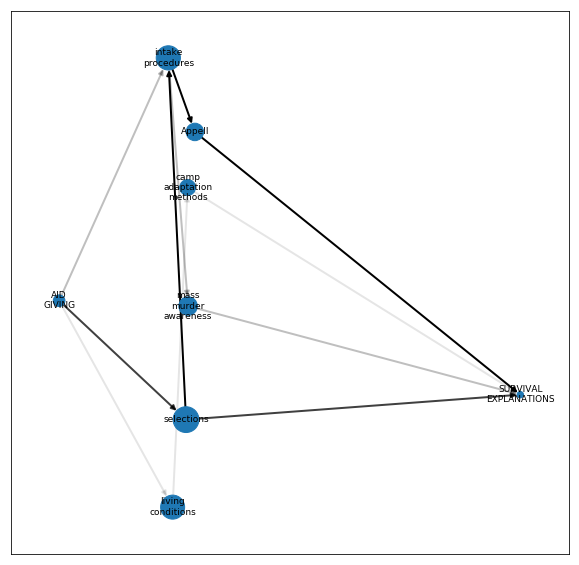

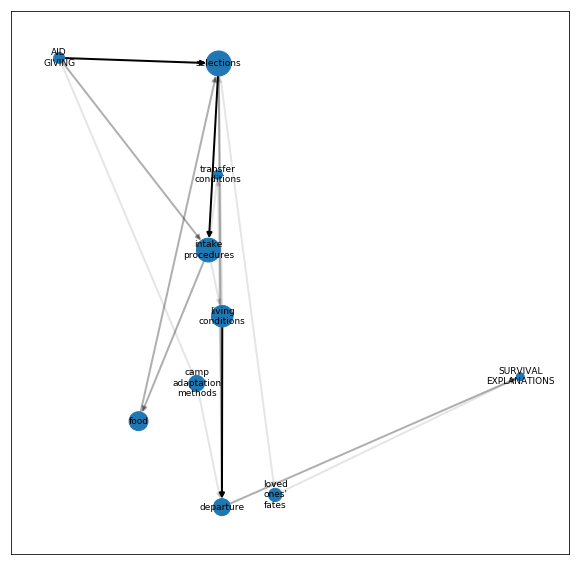

In [682]:

story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.15
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

## Observation 16

In narratives of those men and women who worked, aid giving and survival explanations are  more connected for men:

aid giving-survival explanations


For women 2.6% of total traffic is going through this path, whereas for men, it is 3.39%.

In [688]:
flux = 0.4
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
aid giving-forced labor-survival explanations
10.274883518436624
aid giving-selections-survival explanations
6.262382909056715
aid giving-intake procedures-living conditions-survival explanations
3.463891013521568
aid giving-survival explanations
2.629599814325141
aid giving-food-survival explanations
2.105173850686586
aid giving-camp adaptation methods-survival explanations
1.9000349846387947
aid giving-departure-transfer conditions-forced labor-social relations-survival explanations
1.8276723855252344
aid giving-living conditions-forced labor-camp adaptation methods-departure-survival explanations
1.6550508256336744
aid giving-social relations-survival explanations
1.5957266441234774
aid giving-family interactions-survival explanations
1.3481277578061988
aid giving-loved ones' separations-intake procedures-forced labor-bombardments-survival explanations
1.3264273876776869
aid giving-Blockälteste-forced labor-medical care-survival explanations
1.3057129

6 labels to show
9 labels to show


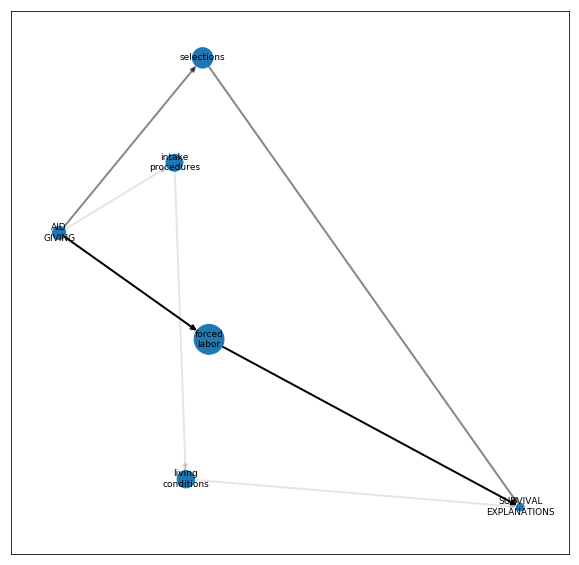

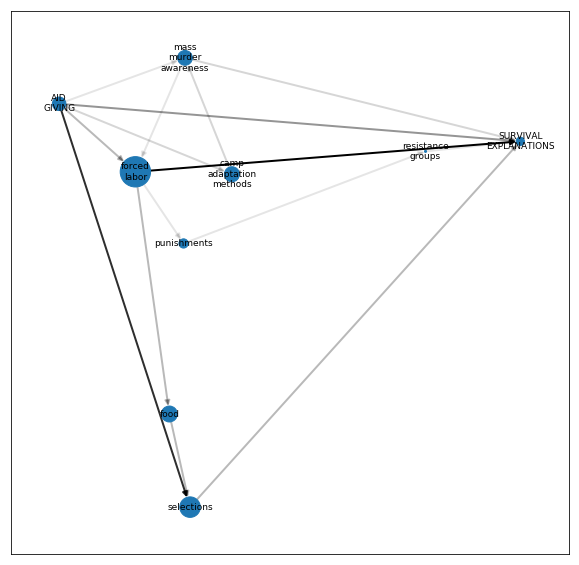

In [690]:

story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 17

In narratives of those men and women who worked, social relations and survival explanations are  more connected for women:

social relations-survival explanations


For women 4.7% of total traffic is going through the path above;  for men 2.5% is going through this path:

social relations-aid giving-survival explanations
2.50368892717799

In [710]:
flux = 0.5
story_start = 'social relations'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
social relations-forced labor-survival explanations
6.580571008586384
social relations-selections-survival explanations
6.204915845414966
social relations-survival explanations
4.770496146893108
social relations-living conditions-survival explanations
2.9110184744683765
social relations-food-selections-intake procedures-forced labor-survival explanations
2.449251345414704
social relations-camp adaptation methods-departure-transfer conditions-forced labor-SS/SD personnel-intake procedures-housing conditions-Appell-food-survival explanations
2.0891770644757104
social relations-departure-forced march conditions-freight trains-selections-intake procedures-living conditions-forced labor-aid giving-survival explanations
1.9820132686035634
social relations-aid giving-selections-intake procedures-forced labor-camp adaptation methods-survival explanations
1.8878889779161065
social relations-transfer to camps-forced march conditions-transfers, means of transport-f

5 labels to show
10 labels to show


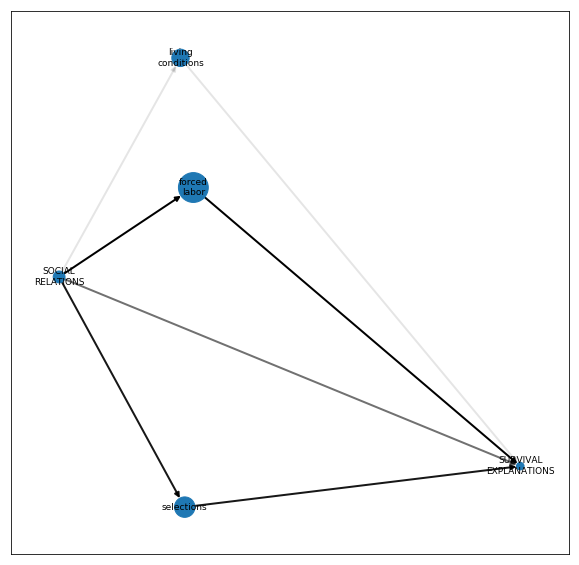

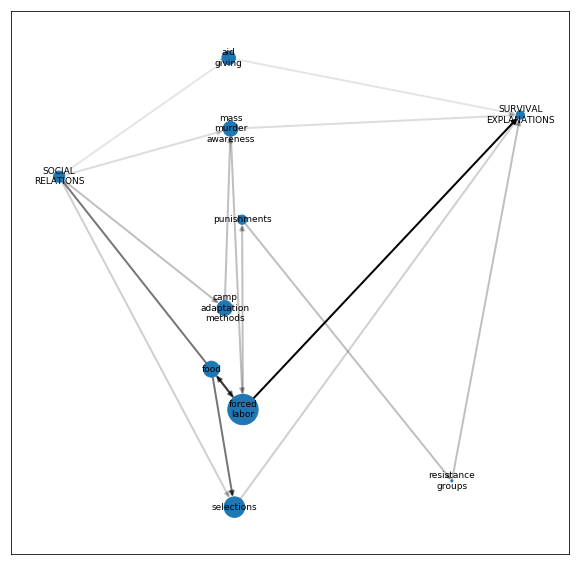

In [704]:

story_start = ['social relations']
story_end = ['survival explanations']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 18

In narratives of those men and women who worked, social relations and forced labor are more connected for men:

social relations-forced labor


For women 7.78% of total traffic is going through the path above;  for men 11% is going through this path:



In [720]:
flux = 0.4
story_start = 'social relations'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
social relations-forced labor
7.786906600083256
social relations-selections-forced labor
4.244549105336844
social relations-living conditions-forced labor
3.0199662502423545
social relations-camp adaptation methods-forced labor
2.920573815229733
social relations-food-forced labor
2.5340287668649326
social relations-selections-intake procedures-forced labor
2.2455166313909984
social relations-aid giving-forced labor
2.100632967083916
social relations-housing conditions-forced labor
1.8133388869811342
social relations-family interactions-forced labor
1.6475823550767346
social relations-departure-forced labor
1.629467267424899
social relations-mass murder awareness-forced labor
1.3805535739482004
social relations-Appell-forced labor
1.2893271810877267
social relations-intake procedures-living conditions-forced labor
1.276734638178566
social relations-sanitary conditions-forced labor
1.1596581524786103
social relations-transfer to camps-forced labor
1.075138

In [764]:
flux = 0.4
story_start = 'forced labor'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
forced labor-social relations
10.931980703238628
forced labor-food-social relations
4.097791664334684
forced labor-mass murder awareness-social relations
3.638779805179761
forced labor-camp adaptation methods-social relations
3.6202488596787252
forced labor-living conditions-social relations
3.502546958870503
forced labor-selections-social relations
2.8097825927002336
forced labor-aid giving-social relations
1.9767142359299033
forced labor-family interactions-social relations
1.4817042204367508
forced labor-punishments-social relations
1.4181992334025164
forced labor-brutal treatment-social relations
1.3759900349097183
forced labor-sanitary conditions-social relations
1.3195652414982855
forced labor-Appell-social relations
1.2759269890314413
forced labor-housing conditions-social relations
1.2062047550939876
forced labor-Mengele, Josef-social relations
1.0824135126526813
forced labor-forced labor conditions-social relations
1.0674281067161289


Path flux

6 labels to show
5 labels to show


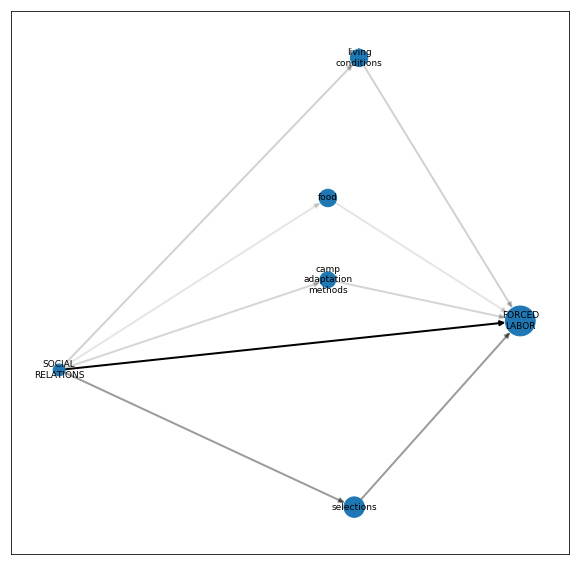

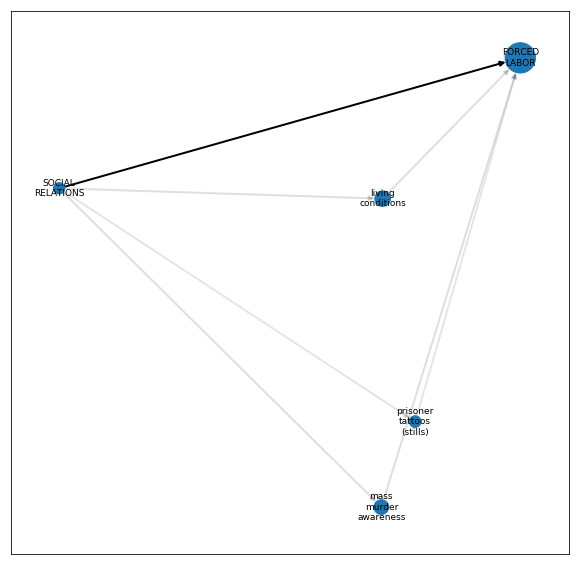

In [721]:

story_start = ['social relations']
story_end = ['forced labor']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 18 B

In narratives of those men and women who worked, social relations and living conditions are  more or less equally connected  for women and men:

social relations-living conditions


For women 5.1% of total traffic is going through the path above;  for men 5.57% is going through this path:

social relations-living conditions

For women 4.3% of total traffic is going through the path above;  for men 4.5% is going through this path:

In [762]:
flux = 0.4
story_start = 'living conditions'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
living conditions-forced labor-social relations
9.592636164124663
living conditions-social relations
5.141839712507309
living conditions-food-social relations
4.92393380605279
living conditions-mass murder awareness-social relations
3.8312712780406306
living conditions-selections-social relations
2.8163124414210516
living conditions-Appell-social relations
2.3965873267150277
living conditions-camp adaptation methods-social relations
2.387516659971643
living conditions-selections-intake procedures-housing conditions-social relations
2.3488189150085415
living conditions-food-sanitary conditions-social relations
1.692398624161717
living conditions-family interactions-social relations
1.5087669372282861
living conditions-aid giving-social relations
1.4083089013255115
living conditions-forced labor-punishments-social relations
1.4012327627555308
living conditions-sanitary conditions-social relations
1.3461763386410703


Path flux		%path	%of total	path
living 

In [763]:
flux = 0.4
story_start = 'social relations'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
social relations-forced labor-living conditions
6.754246200466391
social relations-selections-intake procedures-living conditions
6.499721071926745
social relations-living conditions
4.38237424390237
social relations-food-living conditions
2.532360591117228
social relations-family interactions-living conditions
2.0754976295726015
social relations-housing conditions-Appell-forced labor-living conditions
1.8063057362492936
social relations-sanitary conditions-living conditions
1.5149687893598796
social relations-aid giving-selections-living conditions
1.4723187685323476
social relations-camp adaptation methods-living conditions
1.4173906229177475
social relations-mass murder awareness-living conditions
1.3781055273718992
social relations-intake procedures-forced labor-living conditions
1.3091600344004402
social relations-Appell-living conditions
1.2832370078965392
social relations-SS/SD personnel-intake procedures-prisoner tattoos (stills)-living condition

6 labels to show
5 labels to show


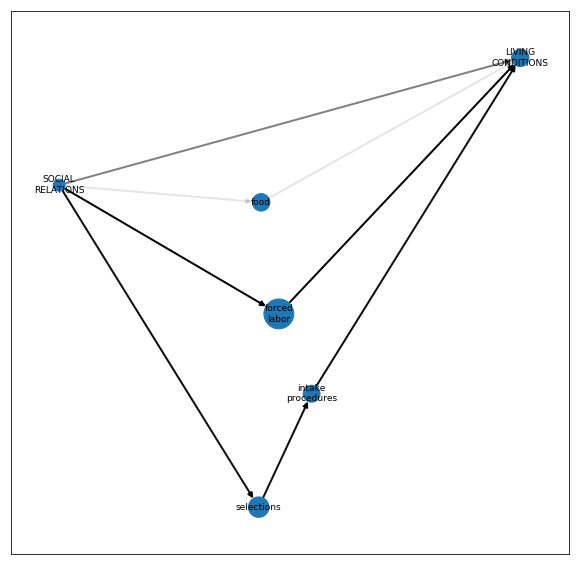

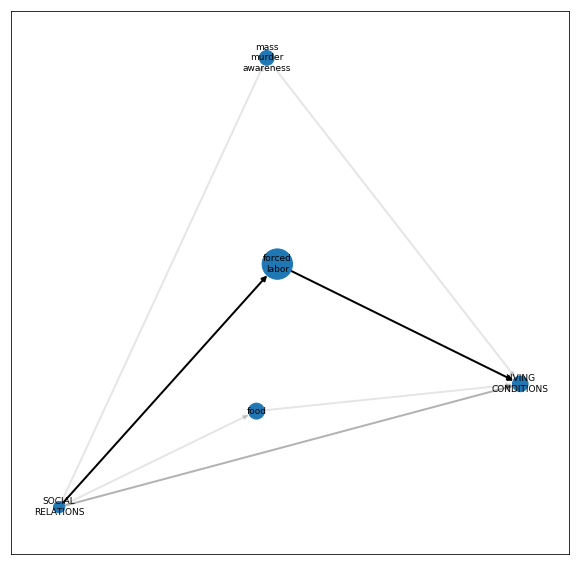

In [761]:

story_start = ['social relations']
story_end = ['living conditions']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 19

Forced labor and aid giving are strongly and more or less equally connected for those women and men who worked. Generally, we see a strong connection between forced labor and aid giving.

In [724]:
flux = 0.4
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
forced labor-aid giving
15.965854319863244
forced labor-selections-aid giving
3.6352711345482547
forced labor-camp adaptation methods-aid giving
3.6206551904111683
forced labor-food-aid giving
3.388325439189465
forced labor-mass murder awareness-aid giving
2.7256555860612366
forced labor-living conditions-aid giving
2.3429061218471556
forced labor-punishments-aid giving
1.6212281352456432
forced labor-social relations-aid giving
1.466397649207134
forced labor-SS/SD personnel-aid giving
1.3980675262354625
forced labor-Appell-aid giving
1.1578194165717905
forced labor-sanitary conditions-aid giving
1.1282913094800882
forced labor-food acquisition-aid giving
1.0666180018518445
forced labor-family interactions-aid giving
1.055153643740731


Path flux		%path	%of total	path
forced labor-aid giving
16.984021815412085
forced labor-selections-aid giving
3.382496298501471
forced labor-camp adaptation methods-aid giving
2.2120997040221457
forced labor-living condit

## Observation 20

Living conditions and food sharing are more connected for those women who worked than those men who worked. For instance, for women 6.6% is going through the following paths:

living conditions-food-food sharing

and 3.5% through the following one:

living conditions-food sharing

In testimonies of men, direct path was not found, instead the traffic is going through the following two paths:

living conditions-social relations-food sharing
2 %

living conditions-aid giving-food sharing
1.3 %


In [768]:
flux = 0.4
story_start = 'living conditions'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
living conditions-forced labor-stealing
18.233951314546122
living conditions-stealing
8.142129193686493
living conditions-food-stealing
6.869952195274502
living conditions-selections-intake procedures-prisoner tattoos (stills)-stealing
2.5827648434764203
living conditions-selections-intake procedures-housing conditions-Appell-food-stealing
2.347338780894568
living conditions-Appell-forced labor-food-sanitary conditions-stealing
1.6507233128927303
living conditions-social relations-stealing
1.5476016595114455


Path flux		%path	%of total	path
living conditions-forced labor-stealing
8.704080794783012
living conditions-forced labor-food-stealing
4.271081642081903
living conditions-forced labor-aid giving-stealing
3.8654559124960324
living conditions-mass murder awareness-forced labor-departure-stealing
3.7223590049670965
living conditions-selections-intake procedures-forced labor-food acquisition-stealing
2.7701105383078657
living conditions-Appell-forced l

## Observation 21

Forced labor and food sharing are more connected for men who worked than those women who worked. For instance, for women 13.3% is going through the following paths:

forced labor-food sharing

for men it is 22%

forced labor-food sharing

In case of aid giving the difference is slighter:

forced labor-aid giving

for women it is 15.965854319863244

and for men it 16.98


In [731]:
flux = 0.4
story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
forced labor-food sharing
13.933977446499657
forced labor-camp adaptation methods-food sharing
4.435612405094663
forced labor-food-food sharing
4.173622219258798
forced labor-selections-food sharing
3.6009842989441596
forced labor-living conditions-food sharing
3.0461541181841323
forced labor-mass murder awareness-food sharing
1.722954632434181
forced labor-brutal treatment-food sharing
1.6964946049017653
forced labor-social relations-food sharing
1.4884953106747065
forced labor-food acquisition-food sharing
1.4711390859393993
forced labor-punishments-food sharing
1.3834375850286074
forced labor-Appell-food sharing
1.214157058916435
forced labor-sanitary conditions-food sharing
1.2044755179957125
forced labor-SS/SD personnel-food sharing
1.1445214808856023


Path flux		%path	%of total	path
forced labor-food sharing
22.409844706135193
forced labor-food-food sharing
3.974354256506686
forced labor-selections-food sharing
2.1781163931951864
forced labor-depa

In [767]:
flux = 0.4
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
forced labor-aid giving
15.965854319863244
forced labor-selections-aid giving
3.6352711345482547
forced labor-camp adaptation methods-aid giving
3.6206551904111683
forced labor-food-aid giving
3.388325439189465
forced labor-mass murder awareness-aid giving
2.7256555860612366
forced labor-living conditions-aid giving
2.3429061218471556
forced labor-punishments-aid giving
1.6212281352456432
forced labor-social relations-aid giving
1.466397649207134
forced labor-SS/SD personnel-aid giving
1.3980675262354625
forced labor-Appell-aid giving
1.1578194165717905
forced labor-sanitary conditions-aid giving
1.1282913094800882
forced labor-food acquisition-aid giving
1.0666180018518445
forced labor-family interactions-aid giving
1.055153643740731


Path flux		%path	%of total	path
forced labor-aid giving
16.984021815412085
forced labor-selections-aid giving
3.382496298501471
forced labor-camp adaptation methods-aid giving
2.2120997040221457
forced labor-living condit

## Observation 22

Those men who did not work are more likely to connect stealing and camp living conditions.

In [814]:
flux = 0.2
story_start = 'living conditions'
story_end = 'stealing'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
living conditions-food-stealing
6.364250469071793
living conditions-selections-intake procedures-Appell-stealing
6.321157978905537
living conditions-stealing
4.335615442875648
living conditions-Appell-food-selections-intake procedures-stealing
3.775507105494364


Path flux		%path	%of total	path
living conditions-stealing
30.402370724407824


In [813]:
flux = 0.2
story_start = 'stealing'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
stealing-selections-intake procedures-living conditions
10.116749298333374
stealing-living conditions
6.570988819126371
stealing-prisoner tattoos (stills)-living conditions
2.8197860139214597
stealing-food-living conditions
2.707776070568664


Path flux		%path	%of total	path
stealing-living conditions
8.813948358670133
stealing-selections-intake procedures-living conditions
4.30596958539694
stealing-housing conditions-food-living conditions
3.2702677570572427
stealing-brutal treatment-living conditions
3.265310145351677
stealing-food-selections-intake procedures-living conditions
2.774274851055918


## Interpretation

The main context of solidarity for women was the barack, i.e. the everyday living environment. By contrast, for men solidarity was rather connected with forced labour and the working environment. Therefore, women and men remember about acts of solidarity in different contexts, which also suggests that they took place in different contexts in the past.

We can see a similar pattern with social activity. Women discuss it in the context of the living environment, whereas man discuss it in the context of work environment.

Generally, speaking if we look at the amount of traffic going through social activity and solidarity, we can see that in case of  women more traffic is going towards solidarity and social activity. 

What also illustrates the different role of solidarity and sociability for men and women is that women are likely to attribute their survival to them

In the dataset we can observe two general trends about the way women and men discuss acts of solidarity and social bonds.
First, both men and women discuss aid giving in the context of camp living conditions and forced labour; however, men are more likely to talk about these topics following forced labour activity, whereas women rather discuss them in context of living conditions in the camp. (This is supported by Observation 1, Observation 2). 
The same can be observed with food sharing. Women rather discuss food sharing in the context of living conditions, and men tend to discuss it in the context of forced labour. (Supported by Observation 4). 
Similarly, women tend to discuss friendship following living conditions rather than men do. However, friendship and forced labour are equally connected for women and men. (Supported by Observation 5 and 6).
At the same time, women tend to connect social relations with the living environment whereas men rather connect it with forced labour (supported by Observation 5A).
The trend that women are more likely to connect the living environment with social activity and solidarity than men is becoming stronger when we compare those men and women who did not work (supported by Observation 14, 14 A. And 14 B).
At the same time, women and men who worked are equally likely to connect the living environment with social relations (supported by Observation 18 B) but social relations remain more connected with forced labour for men. 
Similarly, men who worked are more likely to discuss food sharing in the context of forced labor than women; in case of aid giving the difference is slighter but men still tend to connect forced labour with aid giving more (supported by Observation 21).
All this suggests that in women's barracks more social life and acts of solidarity took place thank in men barracks; by contrast men were more likely to experience solidarity and social bonds during forced labour.  This is also supported by that men who did not work are much more likely to connect the living environment with stealing.

Second, both women and men discuss solidarity and social bonds in the context of survival explanations. However, women are more likely to connect solidarity and social bonds with survivor explanations. (Supported by Observation 8). Women are particularly more likely to attribute their survival of selections to social relations, friends and aid giving (supported by Observation 9). Particularly women who did not work are more likely to connect friendship and aid giving with survival explanations (supported by Observation 13,15).